# **Credit Risk Modeling**
Created by Farin Cyntiya Garini

<center><img src="https://i.postimg.cc/YSMhPWzh/Wait-so-loans-need-to-be-repaid-The-home-credit-risk-prediction-competition-on-Kaggle.jpg"></center>

Source: [deepsense.ai](https://deepsense.ai/wait-so-loans-need-to-be-repaid-the-home-credit-risk-prediction-competition-on-kaggle/)

<center><img src="https://i.postimg.cc/Ls8jH80x/CRISP-DM.png"></center>

Source: [medium.com](https://quyenntk143.medium.com/problem-solving-framework-crisp-1decbb25a42c)

---
## **1. Business Understanding**

### Problem Statement
Credit risk is the possibility of a loss resulting from a borrower's failure to repay a loan or meet contractual obligations. It refers to the risk that a lender may not receive the owed principal and interest, which results in *an interruption of cash flows and increased costs for collection.*

When the company receives a loan application, the company has to decide on loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business for the company.
* If the applicant is not likely to repay the loan, i.e., they are likely to default, then approving the loan may lead to a financial loss for the company.

### Business Metric and Objectives
Consumer credit risk can be measured by the five Cs: credit history, capacity to repay, capital, the loan's conditions, and associated collateral.

* For most lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the most significant loss to the lenders. In this case, the customers labeled as 'charged-off' are the 'defaulters'.
* If one can identify these risky loan applicants, then such loans can be reduced, thereby cutting down the amount of credit loss. This case study aims to identify such applicants using EDA and machine learning.
* In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e., the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

### Model Definition
The model created is to predict credit risk using a dataset provided by the lending company consisting of data on loans accepted and rejected.

---
## **2. Data Understanding**

### Context
In this case study, we'll study risk analytics in banking and financial services to understand how data is used to minimize the risk of losing money while lending to customers. For this analysis, `loan_status` is our target variable.

### Content
Each row represents a customer, each column contains the attributes. The dataset includes information about the customers and loans information and status. The raw data contains 466285 rows and 74 columns.

---
### Import Libraries

In [1]:
# Load libraries
import pandas as pd 
pd.options.mode.chained_assignment = None
pd.set_option('max_columns',None)
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
sns.set_style("whitegrid")

### Read Data

In [2]:
# Read data
df = pd.read_csv('loan_data_2007_2014.csv', index_col=[0])
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,N

In [3]:
# Get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

---
## **3. Data Preparation**

### Data Pre-processing

#### Missing Values

In [4]:
# Drop the columns where all elements are NaN
df = df.dropna(axis=1, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

Columns with all values missing are dropped because they won't give any information to build a model.

In [5]:
# Show columns that have more than 70% missing values
missvals = df.isnull().mean()
missvals[missvals>0.7]

desc                           0.729815
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
dtype: float64

Columns with more than 70% missing values will have to be dropped because trying to impute them might lead to inaccuracies, such as `desc`,`mths_since_last_record`, and `mths_since_last_major_derog`.

#### Irrelevant Features

In the dataset, there are features that are used as identifiers and can't be used in building a model, such as `id`, `member_id`, `url`, `title`, `desc`, `zipcode`, and `emp_title`.

The `sub_grade` column will also be dropped as it contains the same information as the `grade` columns.

Moreover, features that contain information about the future will not also be included in building the model since those events are yet to occur. These features include `next_pymnt_d`, `recoveries`, `collection_recovery_fee`, `total_rec_prncp`, and `total_rec_late_fee`.

#### Drop Data

In [6]:
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'to

In [7]:
# Drop irrelevant columns and rows with missing values
columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                   'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 
                   'mths_since_last_record', 'mths_since_last_major_derog', 'policy_code']
df.drop(columns=columns_to_drop, inplace=True, axis=1)

# Drop all missing values
df.dropna(inplace=True)

In [8]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [9]:
df.shape

(181686, 41)

After dropping some columns, the data now consists of 41 columns with 181686 rows.

### Data Exploration

#### Target Variable

The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. For this analysis, `loan_status` is our target variable.

In [10]:
df['loan_status']

42537         Current
42538      Fully Paid
42539         Current
42541         Current
42543         Current
             ...     
466277    Charged Off
466278     Fully Paid
466282        Current
466283     Fully Paid
466284        Current
Name: loan_status, Length: 181686, dtype: object

In [11]:
df['loan_status'].value_counts()

Current               102069
Fully Paid             59530
Charged Off            14115
Late (31-120 days)      3330
In Grace Period         1627
Late (16-30 days)        636
Default                  379
Name: loan_status, dtype: int64

* There are 102069 current loans. These are the loans that are fully paid to date according to a contract. In other words, the customers make payments on time and reliably, so the lending company doesn't consider them as risks.
* There are 59530 loans fully paid. This means that the customers have paid the loans entirely.
* There are 14115 charged off loans. A charge-off means the lending company has written the account off as a loss, and the account is closed to future charges.
* There are 1627 loans in grace period. 
A grace period is the period between the end of a billing cycle and the date the payment is due. During this time, the customers may not be charged interest as long as they pay their balance in full by the due date. In other words, a grace period is a set amount of time a payment can be delayed without a penalty being imposed.
* There are 636 loans late for 16-30 days and 3330 loans late for 31-120 days to be paid.
* There are 379 loans in default status. Default is a failure to meet the legal obligations of a loan.


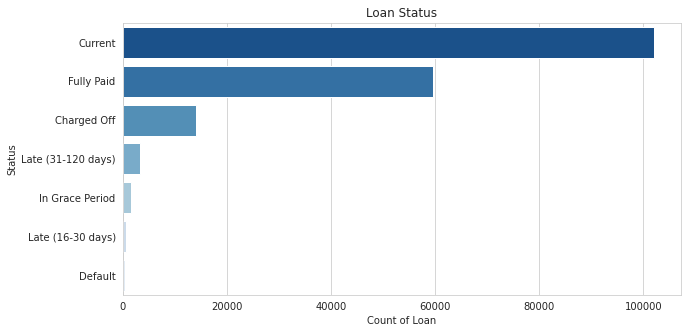

In [12]:
# Create bar plot
plt.figure(figsize=(10,5))
sns.countplot(y='loan_status', data=df, order = df['loan_status'].value_counts().index, palette='Blues_r')

# Add the aesthetics
plt.title('Loan Status')
plt.xlabel('Count of Loan')
plt.ylabel('Status')

# Show the plot
plt.show()

We'll devide the status name as good (accepted) and bad (rejected). In other words, we'll create a variable which will facilitate us whether the loan is good or bad. Based on the unique status of the loan, the good ones are `Current` and `Fully Paid` while the rest are the bad ones, such as `Charged Off`, `Late (31-120 days)`, `In Grace Period`, `Late (16-30 days)`, and `Default`.

In [13]:
# Create a new column based on the loan_status column that will be our target variable
df['good_bad'] = np.where(df.loc[:,'loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'In Grace Period',
                                                        'Late (16-30 days)', 'Default']), 0, 1)
# Drop the original 'loan_status' column
df.drop(columns=['loan_status'], inplace=True)

In [14]:
df['good_bad']

42537     1
42538     1
42539     1
42541     1
42543     1
         ..
466277    0
466278    1
466282    1
466283    1
466284    1
Name: good_bad, Length: 181686, dtype: int64

In [15]:
df['good_bad'].value_counts()

1    161599
0     20087
Name: good_bad, dtype: int64

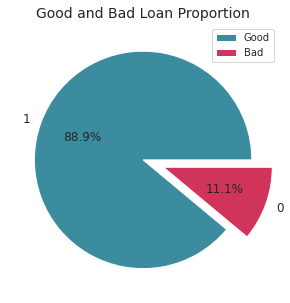

In [16]:
# Good and bad loan proportion
plt.figure(figsize=(10,5))

status = df['good_bad'].value_counts()
labels = df['good_bad'].value_counts().index
explode = [0,0.2]
colors = ['#3a8c9e','#d1345b']

plt.title('Good and Bad Loan Proportion', fontsize=14)
plt.pie(status, labels=labels, explode=explode, colors=colors,
        autopct='%.1f%%', textprops={'fontsize':12})
L = plt.legend()
L.get_texts()[0].set_text('Good')
L.get_texts()[1].set_text('Bad')
plt.show() 

#### Correlation Matrix

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5]), <a list of 14 Text major ticklabel objects>)

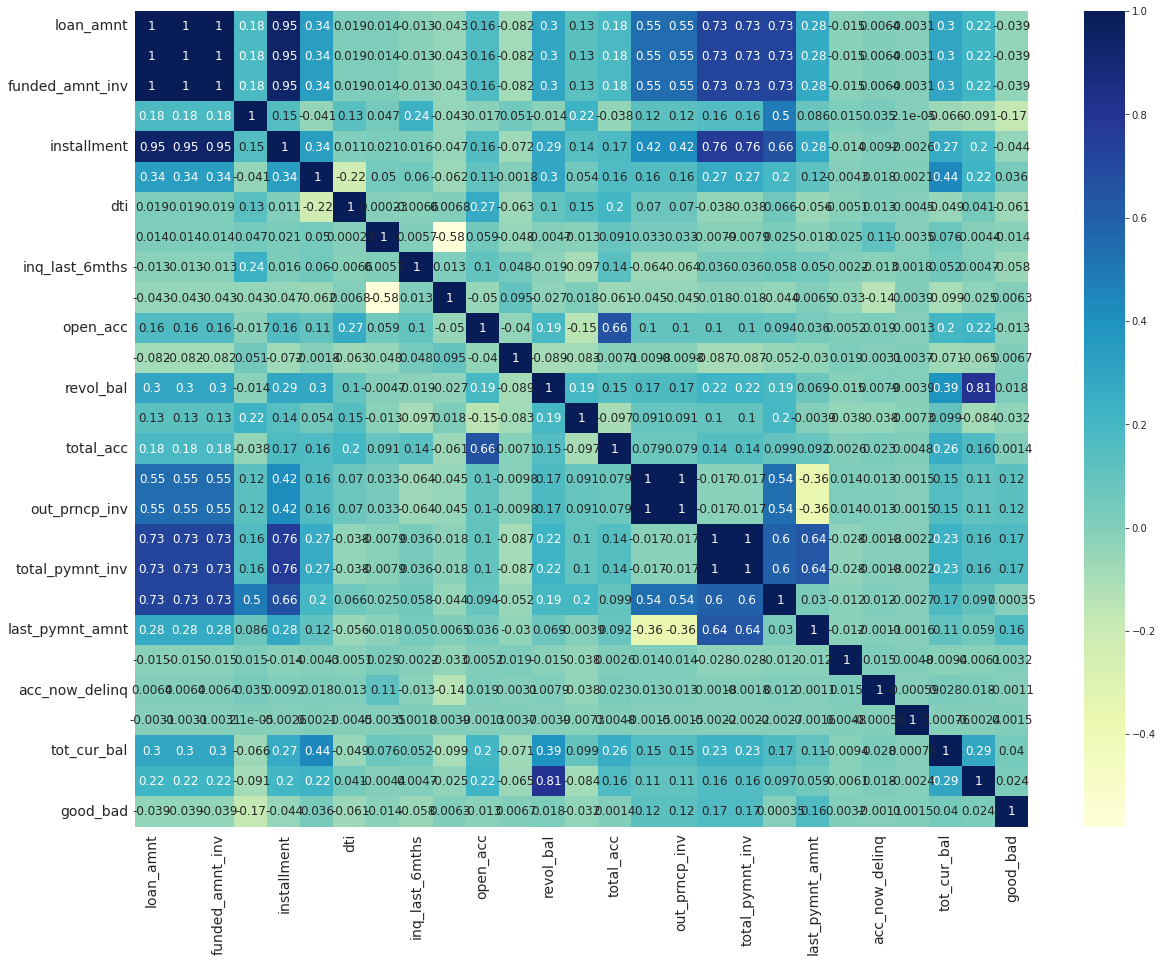

In [17]:
# Correlation matrix
corr_matrix = df.corr()
heatMap = sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", annot_kws={'size':12})
heatmap = plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [18]:
# Drop multicollinear features 
df.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',
                 'total_pymnt_inv', 'out_prncp_inv', 'total_acc'], inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text major ticklabel objects>)

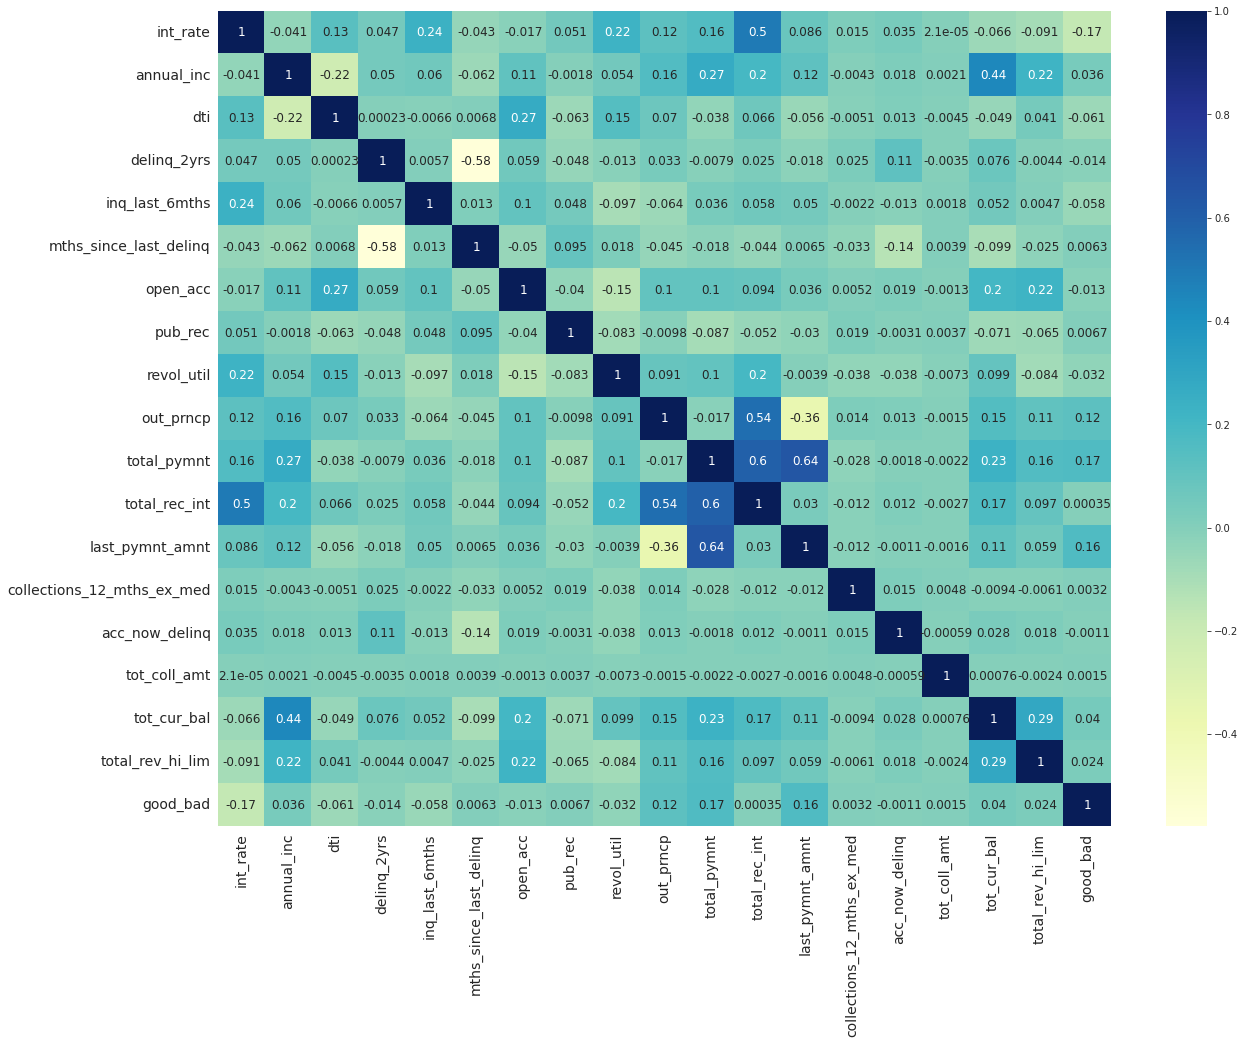

In [19]:
# Correlation matrix
corr_matrix = df.corr()
heatMap = sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", annot_kws={'size':12})
heatmap = plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#### Descriptive Statistics

In [20]:
df.shape

(181686, 33)

In [21]:
# Numerical data summary statistics
df.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
count,181686.000000,1.816860e+05,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,1.816860e+05,1.816860e+05,1.816860e+05,181686.000000
mean,14.449868,7.886698e+04,17.389873,0.638040,0.822942,33.724167,11.756382,0.189244,56.548318,5291.496180,11215.608032,2679.857733,3146.519033,0.016418,0.009808,3.263843e+02,1.505644e+05,2.735155e+04,0.889441
std,4.252272,6.078531e+04,7.787230,1.104461,1.059299,21.716923,4.997763,0.557625,22.583195,6660.857513,7986.951463,2470.226061,5633.250884,0.149082,0.107319,2.157745e+04,1.595617e+05,4.243696e+04,0.313586
min,6.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,35.690000,0.000000,0.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+02,0.000000
25%,11.670000,5.000000e+04,11.530000,0.000000,0.000000,15.000000,8.000000,0.000000,40.300000,0.000000,5485.875000,1037.310000,321.130000,0.000000,0.000000,0.000000e+00,3.245125e+04,1.230000e+04,1.000000
50%,14.160000,6.800000e+04,16.910000,0.000000,0.000000,30.000000,11.000000,0.000000,57.400000,2637.215000,9127.115000,1925.520000,539.810000,0.000000,0.000000,0.000000e+00,9.847150e+04,2.060000e+04,1.000000
75%,17.140000,9.402825e+04,22.900000,1.000000,1.000000,49.000000,14.000000,0.000000,73.900000,8883.127500,14685.300000,3432.090000,3048.777500,0.000000,0.000000,0.000000e+00,2.255148e+05,3.400000e+04,1.000000
max,26.060000,7.500000e+06,39.990000,29.000000,7.000000,188.000000,84.000000,21.000000,892.300000,31898.770000,56087.909920,21840.000000,36170.140000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


In [22]:
# Categorical data summary statistics
df.describe(include='object').T

,count,unique,top,freq
term,181686,2,36 months,129478
grade,181686,7,C,53071
emp_length,181686,11,10+ years,69102
home_ownership,181686,6,MORTGAGE,99629
verification_status,181686,3,Source Verified,64050
issue_d,181686,29,Oct-14,19128
pymnt_plan,181686,2,n,181683
purpose,181686,13,debt_consolidation,112109
addr_state,181686,47,CA,27215
earliest_cr_line,181686,620,Aug-00,1508


#### Data Types

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        181686 non-null  object 
 1   int_rate                    181686 non-null  float64
 2   grade                       181686 non-null  object 
 3   emp_length                  181686 non-null  object 
 4   home_ownership              181686 non-null  object 
 5   annual_inc                  181686 non-null  float64
 6   verification_status         181686 non-null  object 
 7   issue_d                     181686 non-null  object 
 8   pymnt_plan                  181686 non-null  object 
 9   purpose                     181686 non-null  object 
 10  addr_state                  181686 non-null  object 
 11  dti                         181686 non-null  float64
 12  delinq_2yrs                 181686 non-null  float64
 13  earliest_c

There are variables that are not in their appropriate data types and should be treated, such as `term`, `emp_length`, `issue_d`, `earliest_cr_line`, `last_pymnt_d`, and `last_credit_pull_d`.

We'll define functions to help us with this process.

In [24]:
# Convert emp_length to numerical column and assign nan values to zero

def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)
    
emp_length_convert(df, 'emp_length')

df['emp_length'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


array([10,  2,  4,  7,  6,  5,  8,  3,  1,  0,  9])

In [25]:
df['emp_length'].dtype

dtype('int64')

In [26]:
# Convert term column to numeric data type

def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))
    
term_numeric(df, 'term')

In [27]:
df['term'].dtype

dtype('int64')

In [28]:
df[['issue_d', 'last_pymnt_d', 'last_pymnt_d', 'earliest_cr_line']]

,issue_d,last_pymnt_d,last_pymnt_d,earliest_cr_line
42537,Dec-13,Jan-16,Jan-16,Mar-94
42538,Dec-13,Sep-15,Sep-15,Oct-98
42539,Dec-13,Jan-16,Jan-16,Mar-98
42541,Dec-13,Jan-16,Jan-16,Jun-88
42543,Dec-13,Jan-16,Jan-16,Oct-89
...,...,...,...,...
466277,Jan-14,Nov-14,Nov-14,Jul-98
466278,Jan-14,Sep-15,Sep-15,Jun-02
466282,Jan-14,Jan-16,Jan-16,Dec-01
466283,Jan-14,Dec-14,Dec-14,Feb-03


In [29]:
# Preprocess date columns 

def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2022-05-22')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format="%b-%y") # %b = month short version, %y = year short version
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)
  
date_columns(df, 'issue_d')
date_columns(df, 'last_pymnt_d')
date_columns(df, 'last_credit_pull_d')
date_columns(df, 'earliest_cr_line')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           181686 non-null  int64  
 1   int_rate                       181686 non-null  float64
 2   grade                          181686 non-null  object 
 3   emp_length                     181686 non-null  int64  
 4   home_ownership                 181686 non-null  object 
 5   annual_inc                     181686 non-null  float64
 6   verification_status            181686 non-null  object 
 7   pymnt_plan                     181686 non-null  object 
 8   purpose                        181686 non-null  object 
 9   addr_state                     181686 non-null  object 
 10  dti                            181686 non-null  float64
 11  delinq_2yrs                    181686 non-null  float64
 12  inq_last_6mths            

In [31]:
# Check missing values again 

missing_values = df.isnull().sum()
missing_values[missing_values>0]/len(df)

Series([], dtype: float64)

In [32]:
# Separate categorical features from numerical
categorical_features = df.select_dtypes(exclude='number')
numerical_features = df.select_dtypes(exclude='object')

In [33]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                181686 non-null  object
 1   home_ownership       181686 non-null  object
 2   verification_status  181686 non-null  object
 3   pymnt_plan           181686 non-null  object
 4   purpose              181686 non-null  object
 5   addr_state           181686 non-null  object
 6   initial_list_status  181686 non-null  object
 7   application_type     181686 non-null  object
dtypes: object(8)
memory usage: 16.5+ MB


In [34]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           181686 non-null  int64  
 1   int_rate                       181686 non-null  float64
 2   emp_length                     181686 non-null  int64  
 3   annual_inc                     181686 non-null  float64
 4   dti                            181686 non-null  float64
 5   delinq_2yrs                    181686 non-null  float64
 6   inq_last_6mths                 181686 non-null  float64
 7   mths_since_last_delinq         181686 non-null  float64
 8   open_acc                       181686 non-null  float64
 9   pub_rec                        181686 non-null  float64
 10  revol_util                     181686 non-null  float64
 11  out_prncp                      181686 non-null  float64
 12  total_pymnt               

In [35]:
filled_data = df

In [36]:
preprocess_data = df

In [37]:
# Check for any missing values
missing = preprocess_data.isnull().sum()
missing[missing>0] 

Series([], dtype: int64)

#### Bining, Weight of Evidence, Information Value, and Continuous Variables into Categorical Convertion

Weight of Evidence (WoE) and Information Value (IV) can be used to understand the predictive power of an independent variable. WoE helps to understand if a particular class of an independent variable has a higher distribution of good or bad.

The weight of evidence (WOE) will help us determine which categories should be binned together. Whereas, Information Value (IV) will help decide which variables are useful for prediction in the **Logistic Regression model**. Binning helps us convert continuous variables into categorical ones.

##### **Information Value (IV)**

IV shows how much information the original independent variable brings with respect to explaining the dependent variable.

\begin{equation*}
Information Value =   \sum_{i=1}^k \left(PercentageOfGood - PercentageOfBad \right) x \left(ln\left(\frac{percentage-of-good_i}{percentage-of-bad_i}\right) \right)
\end{equation*}

### or

\begin{equation*}
Information Value =   \sum_{i=1}^k \left(PercentageOfGood  - PercentageOfBad \right) x \left(WoE \right)
\end{equation*}

Information Value is always between 0-1.

The greater the information value means the original value yields more information with respect to the outcome.

Values of IV have significance in the below manner:
* 0 < IV < 0.02 - No predictive power
* 0.02 < IV < 0.1 - Weak predictive power
* 0.1 < IV < 0.3 - Medium predictive power
* 0.3 < IV < 0.5 - Strong predictive power
* 0.5 < IV < 1 - Suspiciously high, too good to be true predictive power

In [38]:
# Create function to calculate weight of evidence and information value

def iv_woe(data, target, bins=10, show_woe=False):
    
    # Empty dataframe
    newDF, woeDF = pd.DataFrame(), pd.DataFrame()
    
    # Extract column names
    cols = data.columns
    
    # Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        # Show WOE table
        if show_woe == True:
            print(d)
    return newDF, woeDF
iv, woe = iv_woe(preprocess_data, target='good_bad', bins=20)

Information value of term is 0.036495
Information value of int_rate is 0.32642
Information value of grade is 0.274345
Information value of emp_length is 0.007202
Information value of home_ownership is 0.016348
Information value of annual_inc is 0.030844
Information value of verification_status is 0.032061
Information value of pymnt_plan is 0.000259
Information value of purpose is 0.026637
Information value of addr_state is 0.010508
Information value of dti is 0.039792
Information value of delinq_2yrs is 0.001822
Information value of inq_last_6mths is 0.035231
Information value of mths_since_last_delinq is 0.0032
Information value of open_acc is 0.004062
Information value of pub_rec is 0.000186
Information value of revol_util is 0.011615
Information value of initial_list_status is 0.007988
Information value of out_prncp is 0.404018
Information value of total_pymnt is 0.427237
Information value of total_rec_int is 0.005365
Information value of last_pymnt_amnt is 1.473935
Information valu

In [39]:
print(iv)

                        Variable        IV
0                           term  0.036495
0                       int_rate  0.326420
0                          grade  0.274345
0                     emp_length  0.007202
0                 home_ownership  0.016348
0                     annual_inc  0.030844
0            verification_status  0.032061
0                     pymnt_plan  0.000259
0                        purpose  0.026637
0                     addr_state  0.010508
0                            dti  0.039792
0                    delinq_2yrs  0.001822
0                 inq_last_6mths  0.035231
0         mths_since_last_delinq  0.003200
0                       open_acc  0.004062
0                        pub_rec  0.000186
0                     revol_util  0.011615
0            initial_list_status  0.007988
0                      out_prncp  0.404018
0                    total_pymnt  0.427237
0                  total_rec_int  0.005365
0                last_pymnt_amnt  1.473935
0     colle

The rule of thumb is that all variables with an information value of less than 0.02 are not useful for prediction, and values greater than 0.5 have a suspicious predictive power. Therefore, the following variables will not be included: `emp_length`, `home_ownership`, `pymnt_plan`, `addr_state`, `delinq_2yrs`, `mths_since_last_delinq`, `open_acc`, `pub_rec`, `revol_util`, `initial_list_status`, `total_rec_int`, `last_pymnt_amnt`, `collections_12_mths_ex_med`, `application_type`, `acc_now_delinq`, and `tot_coll_amt`.

In [40]:
# Drop columns with low IV
preprocess_data.drop(columns=['emp_length', 'home_ownership', 'pymnt_plan', 'addr_state', 
                              'delinq_2yrs', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 
                              'revol_util', 'initial_list_status', 'total_rec_int', 'last_pymnt_amnt',
                              'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 
                              'tot_coll_amt'], axis=1, inplace=True)

In [41]:
preprocess_data.shape

(181686, 17)

After removing variables with an information value of less than 0.02 and greater than 0.5, the data now consists of 17 columns with 181686 rows.

In [42]:
preprocess_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           181686 non-null  int64  
 1   int_rate                       181686 non-null  float64
 2   grade                          181686 non-null  object 
 3   annual_inc                     181686 non-null  float64
 4   verification_status            181686 non-null  object 
 5   purpose                        181686 non-null  object 
 6   dti                            181686 non-null  float64
 7   inq_last_6mths                 181686 non-null  float64
 8   out_prncp                      181686 non-null  float64
 9   total_pymnt                    181686 non-null  float64
 10  tot_cur_bal                    181686 non-null  float64
 11  total_rev_hi_lim               181686 non-null  float64
 12  good_bad                  

##### **Dummy Variables**

In [43]:
# Create dummy variables for categorical columns
dummies_data = [pd.get_dummies(preprocess_data['grade'], prefix='grade', prefix_sep=':'),
                pd.get_dummies(preprocess_data['verification_status'], prefix='verification_status', prefix_sep=':'),
                pd.get_dummies(preprocess_data['purpose'], prefix='purpose', prefix_sep=':')]

In [44]:
# Turn dummies_data into dataframe
categorical_dummies = pd.concat(dummies_data, axis=1)

In [45]:
categorical_dummies.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding
42537,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
42538,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
42539,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
42541,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
42543,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [46]:
# Concatenate preprocess_data with categorical_dummies

preprocess_data = pd.concat([preprocess_data, categorical_dummies], axis=1)

In [47]:
preprocess_data.shape

(181686, 40)

In [48]:
preprocess_data.columns

Index(['term', 'int_rate', 'grade', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'inq_last_6mths', 'out_prncp', 'total_pymnt',
       'tot_cur_bal', 'total_rev_hi_lim', 'good_bad', 'mths_since_issue_d',
       'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d',
       'mths_since_earliest_cr_line', 'grade:A', 'grade:B', 'grade:C',
       'grade:D', 'grade:E', 'grade:F', 'grade:G',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'verification_status:Verified',
       'purpose:car', 'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:home_improvement', 'purpose:house', 'purpose:major_purchase',
       'purpose:medical', 'purpose:moving', 'purpose:other',
       'purpose:renewable_energy', 'purpose:small_business',
       'purpose:vacation', 'purpose:wedding'],
      dtype='object')

##### **Weight of Evidence (WoE)**

WoE shows to what extent an independent variable would predict a dependent variable and how much evidence the independent variable has with respect to the differences in the dependent variable.

In a clearer sense, we can understand it this way; WoE shows the extent to which each category of an independent variable will explain the dependent variable.

The formula for calculating WoE in our case would be:
\begin{equation*}
WoE_i= ln\left(\frac{percentage-of-good_i}{percentage-of-bad_i}\right) 
\end{equation*}

##### **Analyzing Categorical Variables**

**Coarse Classing.**
When we categorize the continuous or discrete values into unequal distance categories, this process is called Coarse Classing.

In [49]:
# Create function to calculate weight of evidence of categorical features

def woe_categorical(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df


# Create function to plot weight of evidence values 
# Below we define a function for plotting WoE across categories that takes 2 arguments: a dataframe and a number
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)    

In [50]:
# Separate data into target and features
X = preprocess_data.drop(columns='good_bad', axis=1)
y = preprocess_data['good_bad']

*Analyzing `grade` Variable*

In [51]:
df_grade = woe_categorical(X, 'grade', y)
df_grade

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,1396,0.720630,0.007684,1006.0,390.0,0.006225,0.019416,-1.137455,NaN,NaN,0.274345
1,F,5711,0.764314,0.031433,4365.0,1346.0,0.027011,0.067009,-0.908564,0.043684,0.228890,0.274345
2,E,15542,0.805752,0.085543,12523.0,3019.0,0.077494,0.150296,-0.662404,0.041438,0.246160,0.274345
3,D,33289,0.851332,0.183223,28340.0,4949.0,0.175372,0.246378,-0.339956,0.045580,0.322447,0.274345
4,C,53071,0.890524,0.292103,47261.0,5810.0,0.292458,0.289242,0.011060,0.039192,0.351016,0.274345
5,B,52738,0.926865,0.290270,48881.0,3857.0,0.302483,0.192015,0.454454,0.036341,0.443394,0.274345
6,A,19939,0.964090,0.109744,19223.0,716.0,0.118955,0.035645,1.205137,0.037226,0.750683,0.274345


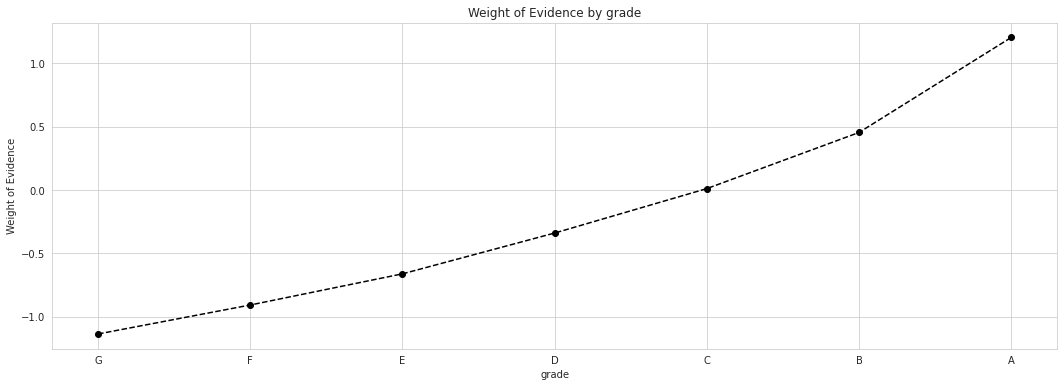

In [52]:
plot_by_woe(df_grade)

It can be seen from the above graph that the grades have significantly different WoE as the grade changes. Therefore, each grade will be kept as a feature.

*Analyzing `verification_status` Variable*

In [53]:
df_grade = woe_categorical(X, 'verification_status', y)
df_grade

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,60766,0.868677,0.334456,52786.0,7980.0,0.326648,0.397272,-0.195738,NaN,NaN,0.032061
1,Source Verified,64050,0.889087,0.352531,56946.0,7104.0,0.352391,0.353662,-0.003600,0.020410,0.192138,0.032061
2,Not Verified,56870,0.912027,0.313013,51867.0,5003.0,0.320961,0.249067,0.253600,0.022941,0.257200,0.032061


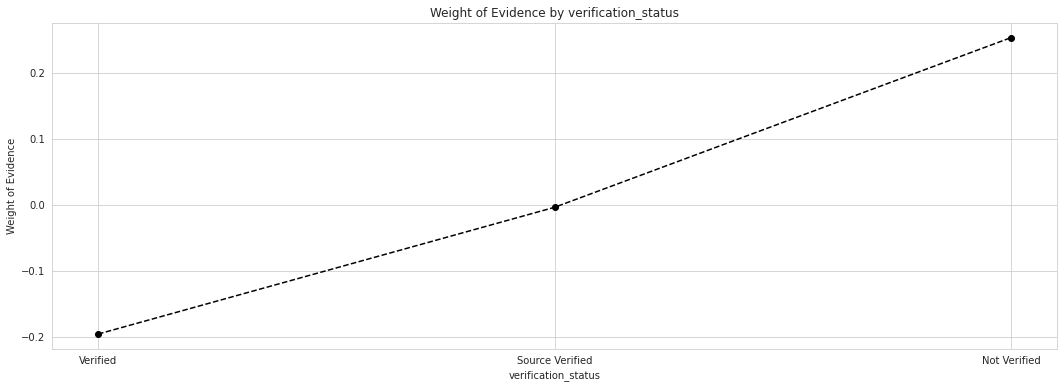

In [54]:
plot_by_woe(df_grade)

From the graph above, it can be seen that this variable has different WoE values and therefore verification status can be used as seperate variables.

*Analyzing `purpose` Variable*

In [55]:
df_grade = woe_categorical(X, 'purpose', y)
df_grade

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,2052,0.800682,0.011294,1643.0,409.0,0.010167,0.020361,-0.694481,NaN,NaN,0.026637
1,renewable_energy,105,0.838095,0.000578,88.0,17.0,0.000545,0.000846,-0.440922,0.037413,0.253560,0.026637
2,moving,976,0.838115,0.005372,818.0,158.0,0.005062,0.007866,-0.440778,0.000020,0.000144,0.026637
3,wedding,411,0.849148,0.002262,349.0,62.0,0.002160,0.003087,-0.357108,0.011034,0.083670,0.026637
4,house,769,0.863459,0.004233,664.0,105.0,0.004109,0.005227,-0.240723,0.014311,0.116384,0.026637
5,medical,1690,0.870414,0.009302,1471.0,219.0,0.009103,0.010903,-0.180419,0.006955,0.060304,0.026637
6,other,8328,0.876321,0.045837,7298.0,1030.0,0.045161,0.051277,-0.127004,0.005907,0.053416,0.026637
7,debt_consolidation,112109,0.883943,0.617048,99098.0,13011.0,0.613234,0.647732,-0.054731,0.007622,0.072273,0.026637
8,home_improvement,11143,0.893206,0.061331,9953.0,1190.0,0.061591,0.059242,0.038876,0.009263,0.093607,0.026637
9,major_purchase,2991,0.898362,0.016462,2687.0,304.0,0.016628,0.015134,0.094108,0.005155,0.055232,0.026637


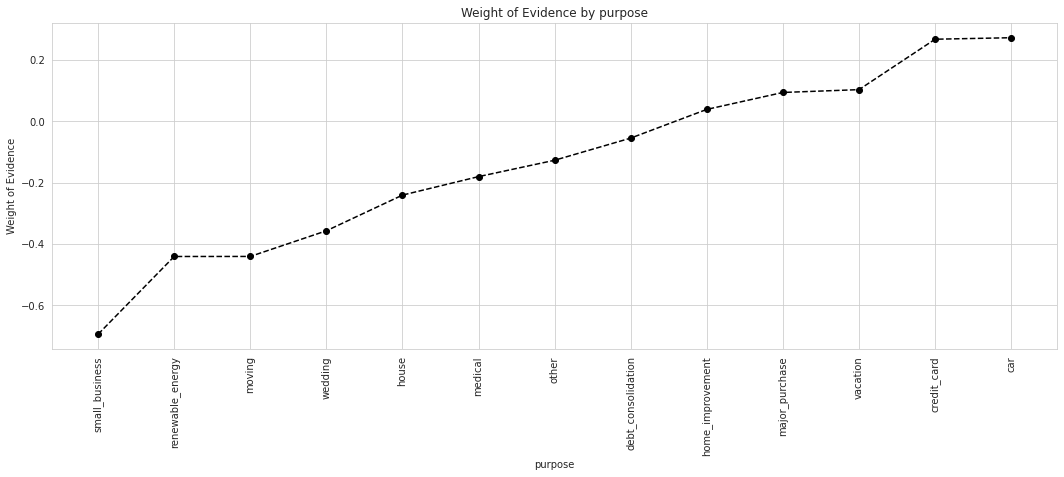

In [56]:
plot_by_woe(df_grade, 90)

The following categories wil be combined together:

* small_business, renewable_energy, moving
* other, house, medical
* wedding, vacation
* debt_consolidation
* home_improvement, major purchase
* car, credit_card

##### **Analyzing Numerical Variables**

**Fine Classing.**
If we have values ranging from 0 to 100 and make equidistant classes and turn the continuous/discrete data into categories, we call it fine classing.


In [57]:
# Create function to calculate weight of evidence of numerical features
def woe_continous(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
# df = df.sort_values(['WoE'])
# df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

*Analyzing `term` Variable*

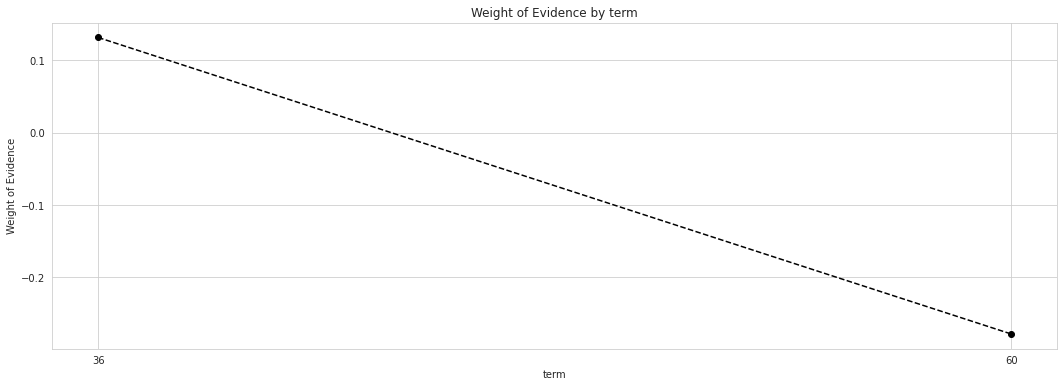

In [58]:
plot_by_woe(woe_continous(X,'term', y))

*Analyzing `int_rate` Variable*

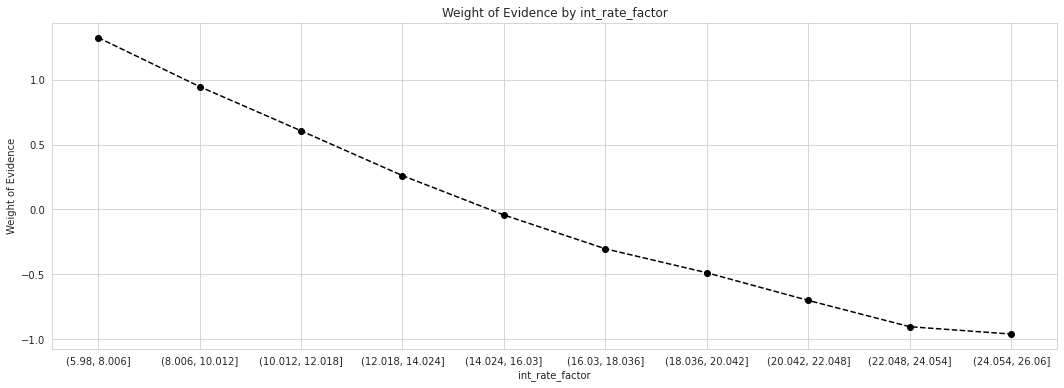

In [59]:
# Interest rate is continuous
X['int_rate_factor'] = pd.cut(X['int_rate'], 10)
plot_by_woe(woe_continous(X,'int_rate_factor', y))

From the graph above, only the last two categories will be combined (22.048, 26.06).

*Analyzing `annual_inc` Variable*

In [60]:
# Annual income is continuous
X['annual_inc_factor'] = pd.cut(X['annual_inc'], 50)
ann_inc_df = woe_continous(X, 'annual_inc_factor', y)
ann_inc_df

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-3496.0, 153920.0]",172204,0.887993,0.947811,152916.0,19288.0,0.946268,0.960223,-0.014640,NaN,NaN,inf
1,"(153920.0, 303840.0]",8507,0.913836,0.046823,7774.0,733.0,0.048107,0.036491,0.276349,0.025842,0.290989,inf
2,"(303840.0, 453760.0]",676,0.926036,0.003721,626.0,50.0,0.003874,0.002489,0.442282,0.012200,0.165933,inf
3,"(453760.0, 603680.0]",177,0.960452,0.000974,170.0,7.0,0.001052,0.000348,1.104843,0.034416,0.662561,inf
4,"(603680.0, 753600.0]",44,0.909091,0.000242,40.0,4.0,0.000248,0.000199,0.217540,0.051361,0.887303,inf
5,"(753600.0, 903520.0]",34,0.911765,0.000187,31.0,3.0,0.000192,0.000149,0.250330,0.002674,0.032790,inf
6,"(903520.0, 1053440.0]",21,0.952381,0.000116,20.0,1.0,0.000124,0.000050,0.910687,0.040616,0.660357,inf
7,"(1053440.0, 1203360.0]",9,1.000000,0.000050,9.0,0.0,0.000056,0.000000,inf,0.047619,inf,inf
8,"(1203360.0, 1353280.0]",4,1.000000,0.000022,4.0,0.0,0.000025,0.000000,inf,0.000000,NaN,inf
9,"(1353280.0, 1503200.0]",1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


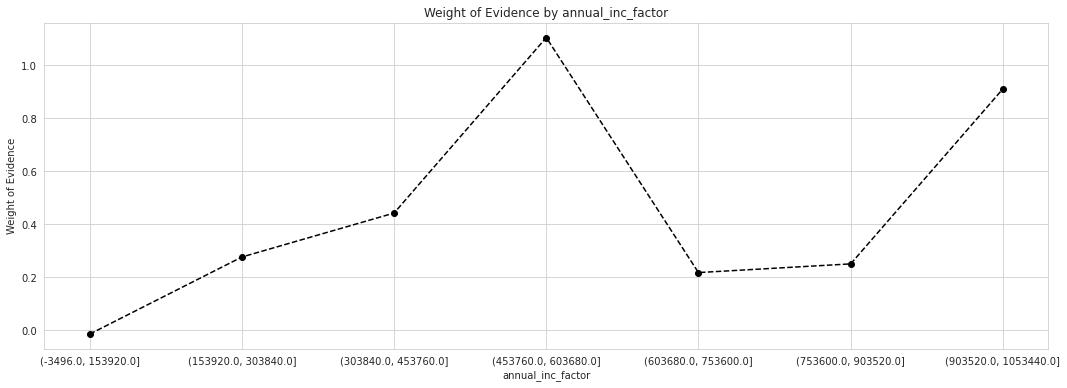

In [61]:
plot_by_woe(woe_continous(X,'annual_inc_factor', y))

We can separate this variable into people with higher and lower income. From the WoE table, it can be seen that as annual income increases, the number of observations decrease, this is because only a few people earn a high income. We will create a new variable for people with income above 150000 dollars and analyze individuals with income below 150000 dollars.

In [62]:
# Analyze income below 150000
X_train_prepr_temp = X[X['annual_inc'] <= 150000].copy()
# Fine-classing again
X_train_prepr_temp['annual_inc_factor'] = pd.cut(X_train_prepr_temp['annual_inc'], 10)
# Make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'annual_inc_factor', y[X_train_prepr_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3854.0, 18600.0]",498,0.859438,0.002896,428.0,70.0,0.002803,0.003633,-0.259356,NaN,NaN,0.026501
1,"(18600.0, 33200.0]",10295,0.862943,0.059868,8884.0,1411.0,0.058182,0.073230,-0.230030,0.003505,0.029325,0.026501
2,"(33200.0, 47800.0]",29058,0.869812,0.168980,25275.0,3783.0,0.165528,0.196336,-0.170685,0.006869,0.059345,0.026501
3,"(47800.0, 62400.0]",38948,0.877709,0.226493,34185.0,4763.0,0.223881,0.247197,-0.099074,0.007897,0.071611,0.026501
4,"(62400.0, 77000.0]",31578,0.890430,0.183635,28118.0,3460.0,0.184147,0.179572,0.025158,0.012721,0.124232,0.026501
5,"(77000.0, 91600.0]",23491,0.900600,0.136607,21156.0,2335.0,0.138553,0.121185,0.133928,0.010170,0.108770,0.026501
6,"(91600.0, 106200.0]",16338,0.903966,0.095010,14769.0,1569.0,0.096723,0.081430,0.172108,0.003366,0.038180,0.026501
7,"(106200.0, 120800.0]",10676,0.910266,0.062084,9718.0,958.0,0.063644,0.049720,0.246904,0.006300,0.074795,0.026501
8,"(120800.0, 135400.0]",6126,0.923278,0.035624,5656.0,470.0,0.037042,0.024393,0.417756,0.013012,0.170852,0.026501
9,"(135400.0, 150000.0]",4953,0.909348,0.028803,4504.0,449.0,0.029497,0.023303,0.235715,0.013930,0.182041,0.026501


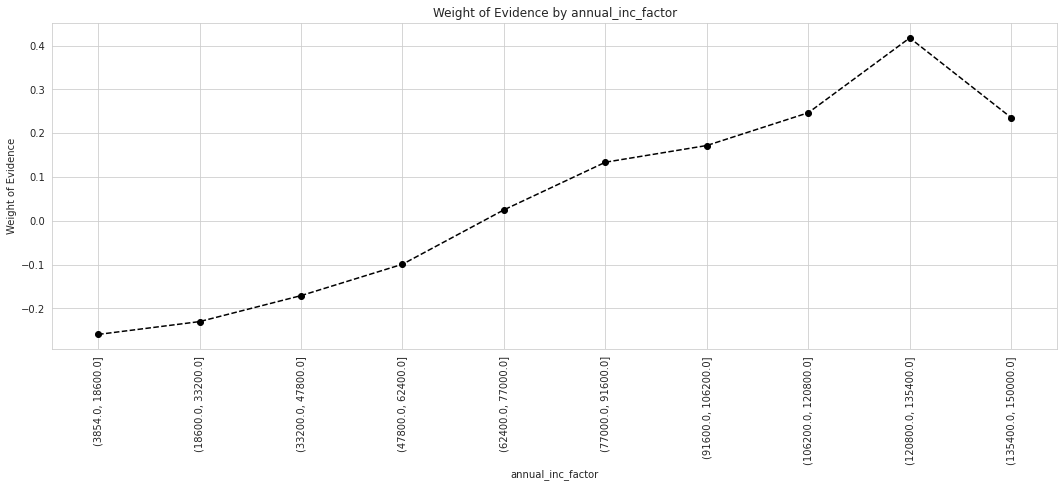

In [63]:
plot_by_woe(df_temp, 90)

From the graph above, we will combine the following categories based on WoE and number of observations: (<=32000), (>32000 <= 50000), (>50000 <=60000), (>60000 <=75000), (>75000 <=90000), (>90000 <=120000), (>120000 <=135000), (>135000 <=150000), (>150000).

*Analyzing `dti` Variable*

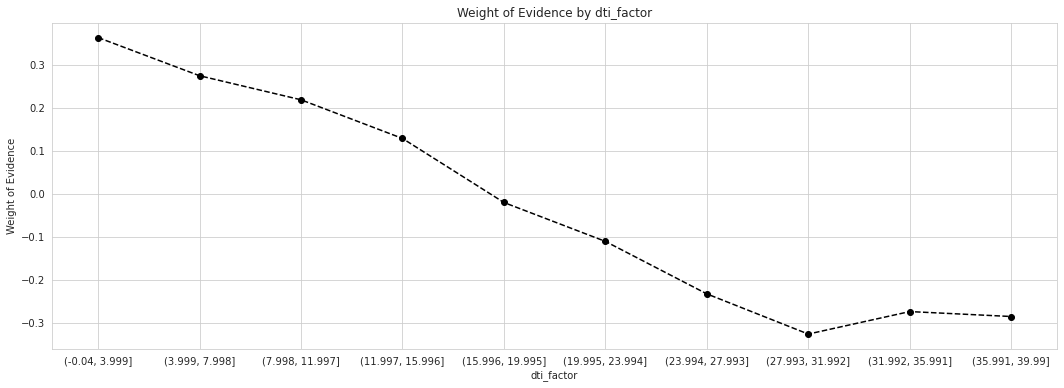

In [64]:
# DTI is continuous
X['dti_factor'] = pd.cut(X['dti'], 10)
plot_by_woe(woe_continous(X,'dti_factor', y))

From the graph above, three categories will be combined (27.993, 31.992), (31.992, 35.991), (35.991, 39.99).

*Analyzing `inq_last_6mths` Variable*

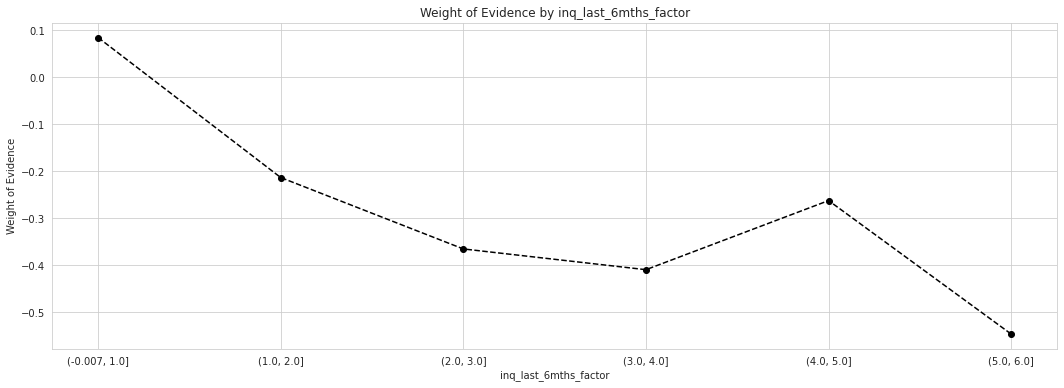

In [65]:
# The number of inquiries in past 6 months is continuous
X['inq_last_6mths_factor'] = pd.cut(X['inq_last_6mths'], 7)
plot_by_woe(woe_continous(X,'inq_last_6mths_factor', y))

The following categories for the number of inquiries in past 6 months will be created:
* <1 months
* 1-2
* 2-4
* 4-7

*Analyzing `out_prncp` Variable*

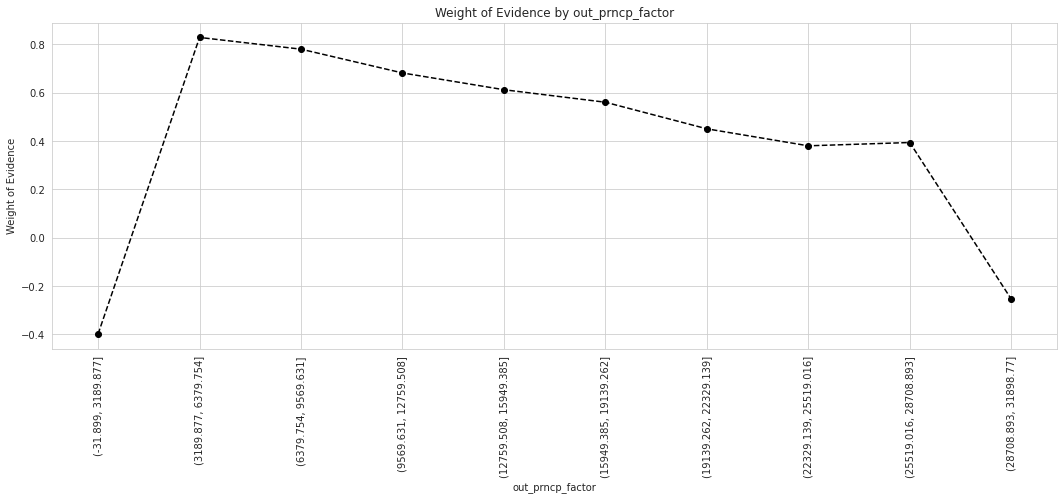

In [66]:
# The remaining outstanding principal for total amount funded is continuous
X['out_prncp_factor'] = pd.cut(X['out_prncp'], 10)
plot_by_woe(woe_continous(X,'out_prncp_factor', y), 90)

*Analyzing `total_pymnt` Variable*

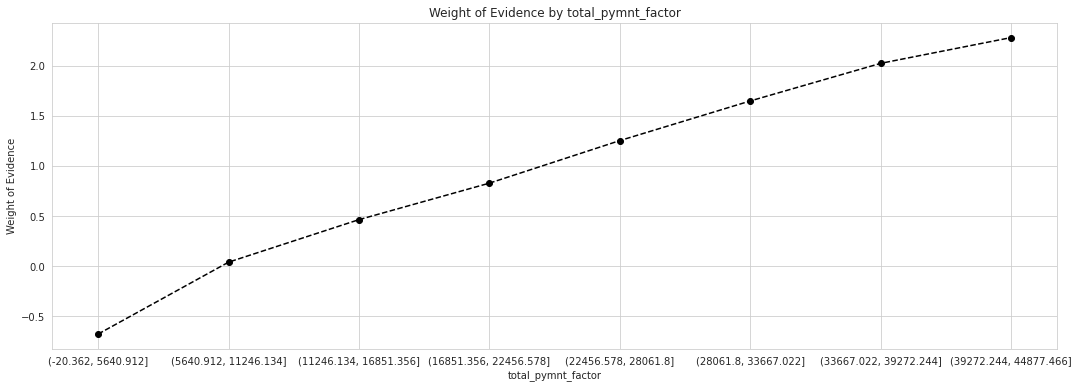

In [67]:
# Total payment is continuous
X['total_pymnt_factor'] = pd.cut(X['total_pymnt'], 10)
plot_by_woe(woe_continous(X,'total_pymnt_factor', y))

*Analyzing `tot_cur_bal` Variable*

In [68]:
# Total current balance is continuous
X['tot_cur_bal_factor'] = pd.cut(X['tot_cur_bal'], 20)
cur_bal_df = woe_continous(X,'tot_cur_bal_factor', y)
cur_bal_df

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-8000.078, 400003.9]",169250,0.887090,0.931552,150140.0,19110.0,0.929090,0.951362,-0.023689,NaN,NaN,inf
1,"(400003.9, 800007.8]",11512,0.920778,0.063362,10600.0,912.0,0.065594,0.045402,0.367924,0.033688,0.391613,inf
2,"(800007.8, 1200011.7]",731,0.927497,0.004023,678.0,53.0,0.004196,0.002639,0.463810,0.006718,0.095886,inf
3,"(1200011.7, 1600015.6]",126,0.960317,0.000694,121.0,5.0,0.000749,0.000249,1.101308,0.032821,0.637497,inf
4,"(1600015.6, 2000019.5]",33,0.848485,0.000182,28.0,5.0,0.000173,0.000249,-0.362279,0.111833,1.463586,inf
5,"(2000019.5, 2400023.4]",16,0.937500,0.000088,15.0,1.0,0.000093,0.000050,0.623005,0.089015,0.985284,inf
6,"(2400023.4, 2800027.3]",8,1.000000,0.000044,8.0,0.0,0.000050,0.000000,inf,0.062500,inf,inf
7,"(2800027.3, 3200031.2]",2,1.000000,0.000011,2.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf
8,"(3200031.2, 3600035.1]",1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf
9,"(3600035.1, 4000039.0]",4,0.750000,0.000022,3.0,1.0,0.000019,0.000050,-0.986433,0.250000,inf,inf


In [69]:
# Analyze total current balance below 400000 
X_train_prepr_temp = X[X['tot_cur_bal'] <= 400000].copy()
# Fine-classing again
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(X_train_prepr_temp['tot_cur_bal'], 10)
# Make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'tot_cur_bal_factor', y[X_train_prepr_temp.index])
df_temp

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-399.999, 39999.9]",55529,0.881485,0.328091,48948.0,6581.0,0.326018,0.344375,-0.054778,NaN,NaN,0.012668
1,"(39999.9, 79999.8]",28089,0.872762,0.165963,24515.0,3574.0,0.163282,0.187023,-0.135750,0.008724,0.080972,0.012668
2,"(79999.8, 119999.7]",14663,0.884744,0.086636,12973.0,1690.0,0.086407,0.088435,-0.023208,0.011982,0.112542,0.012668
3,"(119999.7, 159999.6]",14742,0.886990,0.087102,13076.0,1666.0,0.087093,0.087179,-0.000997,0.002246,0.022211,0.012668
4,"(159999.6, 199999.5]",14896,0.891313,0.088012,13277.0,1619.0,0.088431,0.084720,0.042875,0.004324,0.043872,0.012668
5,"(199999.5, 239999.4]",12642,0.896377,0.074695,11332.0,1310.0,0.075477,0.068550,0.096254,0.005064,0.053379,0.012668
6,"(239999.4, 279999.3]",10255,0.906192,0.060591,9293.0,962.0,0.061896,0.050340,0.206652,0.009815,0.110399,0.012668
7,"(279999.3, 319999.2]",8030,0.902989,0.047445,7251.0,779.0,0.048295,0.040764,0.169534,0.003203,0.037119,0.012668
8,"(319999.2, 359999.1]",5931,0.914011,0.035043,5421.0,510.0,0.036107,0.026688,0.302275,0.011022,0.132741,0.012668
9,"(359999.1, 399999.0]",4472,0.906306,0.026423,4053.0,419.0,0.026995,0.021926,0.207992,0.007705,0.094283,0.012668


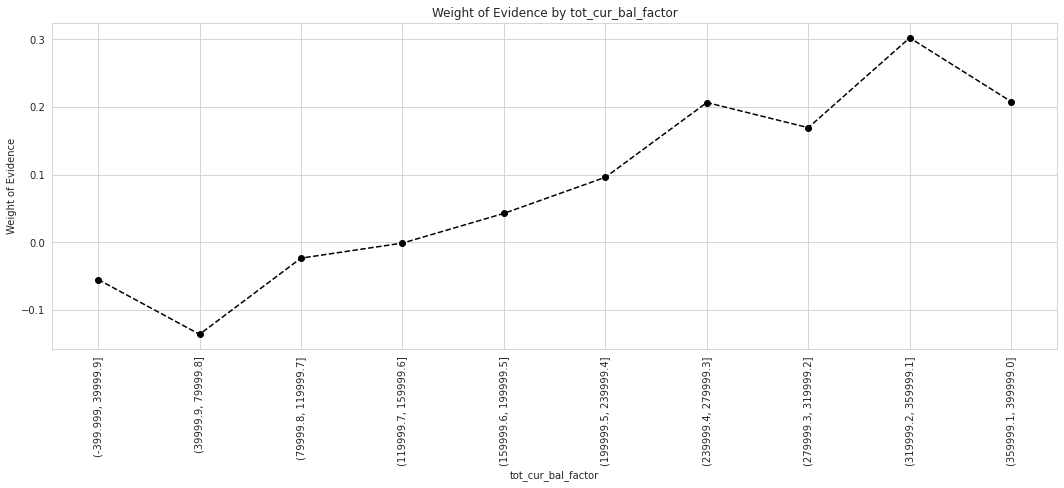

In [70]:
plot_by_woe(df_temp, 90)

From the graph above, we will combine the following categories based on WoE and number of observations: <40000, 40000-80000, 80000-120000, 120000-160000, 160000-200000, 200000-240000, 240000-320000, 320000-400000.

*Analyzing `total_rev_hi_lim` Variable*


In [71]:
# Total revolving high credit limit is continuous
X['total_rev_hi_lim_factor'] = pd.cut(X['total_rev_hi_lim'], 100)
total_rev_hi_lim_df = woe_continous(X,'total_rev_hi_lim_factor', y)
total_rev_hi_lim_df

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9899.899, 100098.99]",178475,0.888651,0.982327,158602.0,19873.0,0.981454,0.989346,-0.008009,NaN,NaN,inf
1,"(100098.99, 200097.98]",2708,0.933530,0.014905,2528.0,180.0,0.015644,0.008961,0.557182,0.044879,0.565191,inf
2,"(200097.98, 300096.97]",351,0.931624,0.001932,327.0,24.0,0.002024,0.001195,0.526861,0.001906,0.030321,inf
3,"(300096.97, 400095.96]",102,0.911765,0.000561,93.0,9.0,0.000575,0.000448,0.250330,0.019859,0.276531,inf
4,"(400095.96, 500094.95]",27,1.000000,0.000149,27.0,0.0,0.000167,0.000000,inf,0.088235,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(9500004.05, 9600003.04]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
96,"(9600003.04, 9700002.03]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(9700002.03, 9800001.02]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(9800001.02, 9900000.01]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [72]:
# Analyze total revolving high credit limit below 100000
X_train_prepr_temp = X[X['total_rev_hi_lim'] <= 100000].copy()
# Fine-classing again
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(X_train_prepr_temp['total_rev_hi_lim'],10)
# Make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'total_rev_hi_lim_factor', y[X_train_prepr_temp.index])
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.1, 10090.0]",32152,0.874347,0.180148,28112.0,4040.0,0.177249,0.203291,-0.137084,NaN,NaN,0.015368
1,"(10090.0, 20080.0]",55916,0.882019,0.313299,49319.0,6597.0,0.310961,0.331958,-0.065341,0.007673,0.071743,0.015368
2,"(20080.0, 30070.0]",37940,0.890169,0.212579,33773.0,4167.0,0.212942,0.209681,0.015429,0.008149,0.080771,0.015368
3,"(30070.0, 40060.0]",22348,0.894263,0.125216,19985.0,2363.0,0.126007,0.118905,0.058014,0.004095,0.042585,0.015368
4,"(40060.0, 50050.0]",13247,0.905715,0.074223,11998.0,1249.0,0.075648,0.062849,0.185361,0.011451,0.127347,0.015368
5,"(50050.0, 60040.0]",7296,0.907346,0.040880,6620.0,676.0,0.041740,0.034016,0.204622,0.001632,0.019261,0.015368
6,"(60040.0, 70030.0]",4381,0.914860,0.024547,4008.0,373.0,0.025271,0.018769,0.297433,0.007513,0.092812,0.015368
7,"(70030.0, 80020.0]",2534,0.913181,0.014198,2314.0,220.0,0.014590,0.011070,0.276069,0.001679,0.021364,0.015368
8,"(80020.0, 90010.0]",1630,0.926380,0.009133,1510.0,120.0,0.009521,0.006038,0.455337,0.013200,0.179268,0.015368
9,"(90010.0, 100000.0]",1031,0.934045,0.005777,963.0,68.0,0.006072,0.003422,0.573510,0.007664,0.118173,0.015368


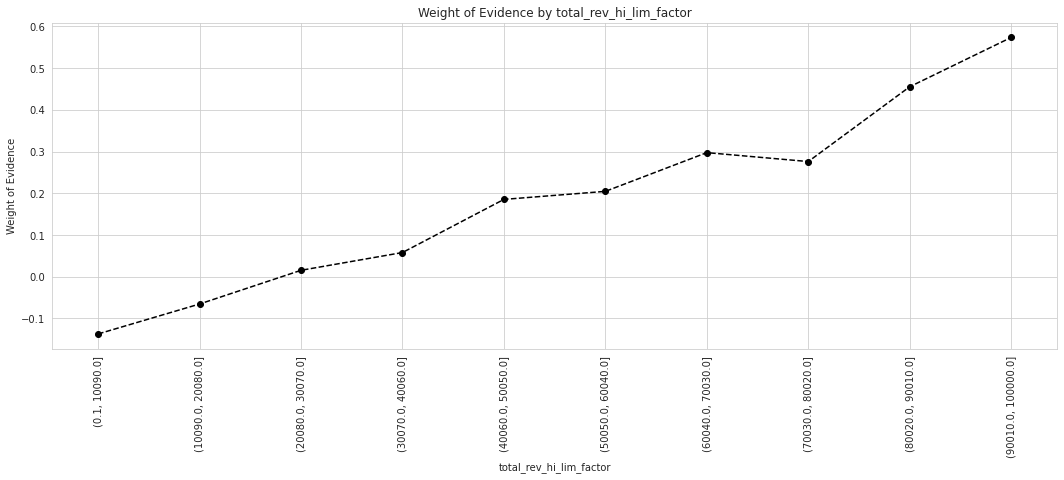

In [73]:
plot_by_woe(df_temp, 90)

*Analyzing `mths_since_issue_d` Variable*

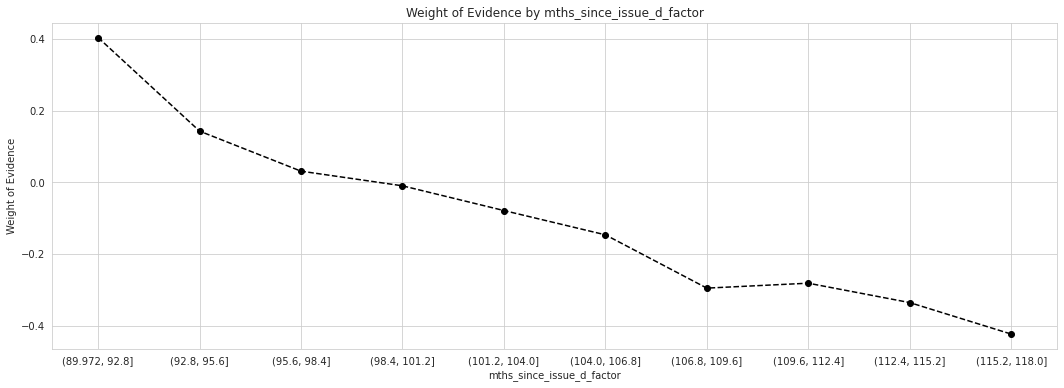

In [74]:
# Months since loan issued is continuous
X['mths_since_issue_d_factor'] = pd.cut(X['mths_since_issue_d'], 10)
plot_by_woe(woe_continous(X,'mths_since_issue_d_factor', y))

*Analyzing `mths_since_last_pymnt_d` Variable*

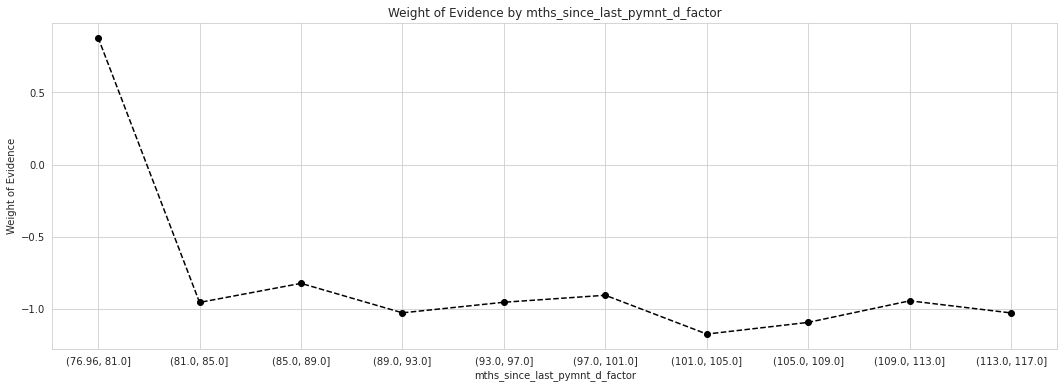

In [75]:
# Months since last payment is continuous
X['mths_since_last_pymnt_d_factor'] = pd.cut(X['mths_since_last_pymnt_d'], 10)
plot_by_woe(woe_continous(X,'mths_since_last_pymnt_d_factor', y))

*Analyzing `mths_since_last_credit_pull_d` Variable*

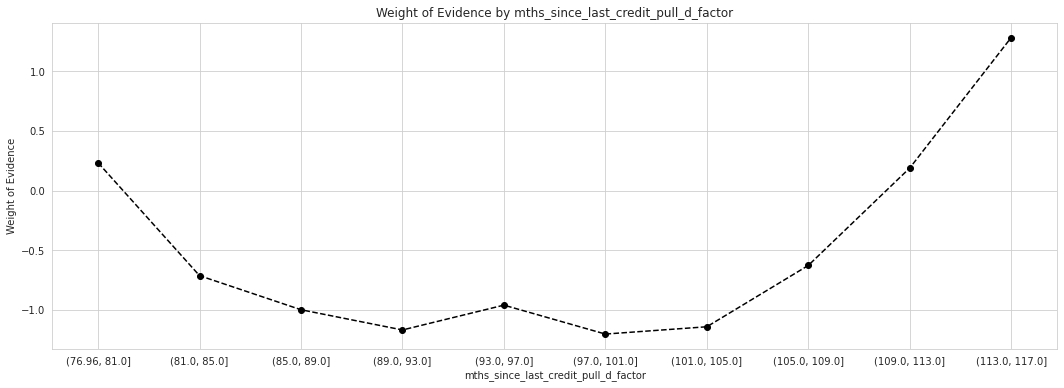

In [76]:
# Months since last credit pull is continuous
X['mths_since_last_credit_pull_d_factor'] = pd.cut(X['mths_since_last_credit_pull_d'], 10)
plot_by_woe(woe_continous(X,'mths_since_last_credit_pull_d_factor', y))

*Analyzing `mths_since_earliest_cr_line` Variable*

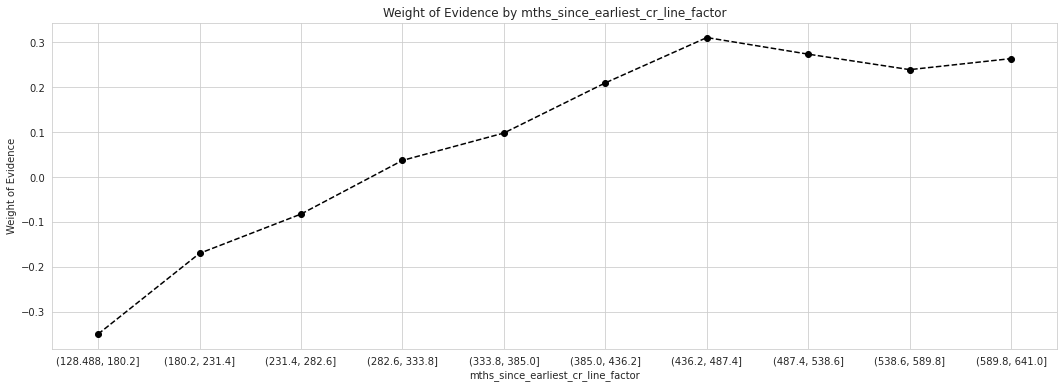

In [77]:
# Months since last payment is continuous
X['mths_since_earliest_cr_line_factor'] = pd.cut(X['mths_since_earliest_cr_line'], 10)
plot_by_woe(woe_continous(X,'mths_since_earliest_cr_line_factor', y))

##### **Creating New Features based on WoE**

In [78]:
# Create a new dataframe and start with the grade variable
new_df = preprocess_data.loc[:, 'grade:A':'grade:G']

# Check to see if it works
new_df.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
42537,1,0,0,0,0,0,0
42538,0,1,0,0,0,0,0
42539,1,0,0,0,0,0,0
42541,0,1,0,0,0,0,0
42543,0,1,0,0,0,0,0


In [79]:
# Create new features

# verification_status
new_df['verification_status:NOT_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Not Verified']
new_df['verification_status:SOURCE_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Source Verified']
new_df['verification_status:VERIFIED'] = preprocess_data.loc[:, 'verification_status:Verified']

# purpose
new_df['purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING'] = sum([preprocess_data['purpose:small_business'],  preprocess_data['purpose:renewable_energy'], preprocess_data['purpose:moving']])
new_df['purpose:OTHER_HOUSE_MEDICAL'] = sum([preprocess_data['purpose:other'], preprocess_data['purpose:house'], preprocess_data['purpose:medical']])
new_df ['purpose:WEDDING_VACATION'] = sum([preprocess_data['purpose:wedding'], preprocess_data['purpose:vacation']])
new_df ['purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE'] = sum([preprocess_data['purpose:home_improvement'], preprocess_data['purpose:major_purchase']])
new_df ['purpose:CAR_CREDIT_CARD'] = sum([preprocess_data['purpose:car'], preprocess_data['purpose:credit_card']])

# term 
new_df['term:36'] = np.where((preprocess_data['term'] == 36), 1, 0)
new_df['term:60'] = np.where((preprocess_data['term'] == 60), 1,0)

# int_rate_factor
new_df['int_rate:<7.484'] = np.where((preprocess_data['int_rate'] <= 7.484), 1, 0)
new_df['int_rate:7.484-9.548'] = np.where((preprocess_data['int_rate'] > 7.484) & (preprocess_data['int_rate'] <= 9.548), 1, 0)
new_df['int_rate:9.548-11.612'] = np.where((preprocess_data['int_rate'] > 9.548) & (preprocess_data['int_rate'] <= 11.612), 1, 0)
new_df['int_rate:11.612-13.676'] = np.where((preprocess_data['int_rate'] > 11.612) & (preprocess_data['int_rate'] <= 13.676), 1, 0)
new_df['int_rate:13.676-15.74'] = np.where((preprocess_data['int_rate'] > 13.676) & (preprocess_data['int_rate'] <= 15.74), 1, 0)
new_df['int_rate:15.74-17.804'] = np.where((preprocess_data['int_rate'] > 15.74) & (preprocess_data['int_rate'] <= 17.804), 1, 0)
new_df['int_rate:17.804-19.868'] = np.where((preprocess_data['int_rate'] > 17.804) & (preprocess_data['int_rate'] <= 19.868), 1, 0)
new_df['int_rate:7.19.868-21.932'] = np.where((preprocess_data['int_rate'] > 19.868) & (preprocess_data['int_rate'] <= 21.932), 1, 0)
new_df['int_rate:21.932-26.06'] = np.where((preprocess_data['int_rate'] > 21.932) & (preprocess_data['int_rate'] <= 26.06), 1, 0)

# annual_inc 
new_df['annual_inc:<32000'] = np.where((preprocess_data['annual_inc'] <= 32000), 1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000), 1, 0)
new_df['annual_inc:50000-60000'] = np.where((preprocess_data['annual_inc'] > 50000) & (preprocess_data['annual_inc'] <= 60000), 1, 0)
new_df['annual_inc:60000-75000'] = np.where((preprocess_data['annual_inc'] > 60000) & (preprocess_data['annual_inc'] <= 75000), 1, 0)
new_df['annual_inc:75000-90000'] = np.where((preprocess_data['annual_inc'] > 75000) & (preprocess_data['annual_inc'] <= 90000), 1, 0)
new_df['annual_inc:90000-120000'] = np.where((preprocess_data['annual_inc'] > 90000) & (preprocess_data['annual_inc'] <= 120000), 1, 0)
new_df['annual_inc:120000-135000'] = np.where((preprocess_data['annual_inc'] > 120000) & (preprocess_data['annual_inc'] <= 135000), 1, 0)
new_df['annual_inc:135000-150000'] = np.where((preprocess_data['annual_inc'] > 135000) & (preprocess_data['annual_inc'] <= 150000), 1, 0)
new_df['annual_inc:>150000'] = np.where((preprocess_data['annual_inc'] > 150000), 1, 0)

# dti 
new_df['dti:<4'] = np.where((preprocess_data['dti'] <= 4), 1, 0)
new_df['dti:4-8'] = np.where((preprocess_data['dti'] > 4) & (preprocess_data['dti'] <= 8), 1, 0)
new_df['dti:8-12'] = np.where((preprocess_data['dti'] > 8) & (preprocess_data['dti'] <= 12), 1, 0)
new_df['dti:12-16'] = np.where((preprocess_data['dti'] > 12) & (preprocess_data['dti'] <= 16), 1, 0)
new_df['dti:16-20'] = np.where((preprocess_data['dti'] > 16) & (preprocess_data['dti'] <= 20), 1, 0)
new_df['dti:20-23'] = np.where((preprocess_data['dti'] > 20) & (preprocess_data['dti'] <= 23), 1, 0)
new_df['dti:23-27'] = np.where((preprocess_data['dti'] > 23) & (preprocess_data['dti'] <= 27), 1, 0)
new_df['dti:27-40'] = np.where((preprocess_data['dti'] > 27) & (preprocess_data['dti'] <= 40), 1, 0)

# inq_last_6mths
new_df['inq_last_6mths:<1'] = np.where((preprocess_data['inq_last_6mths'] <= 1), 1, 0)
new_df['inq_last_6mths:1-2'] = np.where((preprocess_data['inq_last_6mths'] > 1)& (preprocess_data['inq_last_6mths'] <= 2), 1, 0)
new_df['inq_last_6mths:2-4'] = np.where((preprocess_data['inq_last_6mths'] > 2)& (preprocess_data['inq_last_6mths'] <= 4), 1, 0)
new_df['inq_last_6mths:4-7'] = np.where((preprocess_data['inq_last_6mths'] > 4)& (preprocess_data['inq_last_6mths'] <= 7), 1, 0)

# out_prncp
new_df['out_prncp:<3000'] = np.where((preprocess_data['out_prncp'] <= 3000), 1,0)
new_df['out_prncp:3000-6000'] = np.where((preprocess_data['out_prncp'] > 3000) & (preprocess_data['out_prncp'] <= 6000), 1, 0)
new_df['out_prncp:6000-10000'] = np.where((preprocess_data['out_prncp'] > 6000) & (preprocess_data['out_prncp'] <= 10000), 1, 0)
new_df['out_prncp:10000-12000'] = np.where((preprocess_data['out_prncp'] > 10000) & (preprocess_data['out_prncp'] <= 12000), 1, 0)
new_df['out_prncp:>12000'] = np.where((preprocess_data['out_prncp'] > 12000), 1, 0)

# total_pymnt
new_df['total_pymnt:<5000'] = np.where((preprocess_data['total_pymnt'] <= 5000), 1, 0)
new_df['total_pymnt:5000-11000'] = np.where((preprocess_data['total_pymnt'] > 5000) &( preprocess_data['total_pymnt'] <= 11000), 1, 0)
new_df['total_pymnt:11000-16000'] = np.where((preprocess_data['total_pymnt'] > 11000) & (preprocess_data['total_pymnt'] <= 16000), 1, 0)
new_df['total_pymnt:16000-22000'] = np.where((preprocess_data['total_pymnt'] > 16000) & (preprocess_data['total_pymnt'] <= 22000), 1, 0)
new_df['total_pymnt:>22000'] = np.where((preprocess_data['total_pymnt'] > 22000), 1, 0)

# tot_cur_bal
new_df['tot_cur_bal:<40000'] = np.where((preprocess_data['tot_cur_bal'] <= 40000), 1, 0)
new_df['tot_cur_bal:40000-80000'] = np.where((preprocess_data['tot_cur_bal'] > 40000) & (preprocess_data['tot_cur_bal'] <= 80000), 1, 0)
new_df['tot_cur_bal:80000-120000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:120000-160000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:160000-200000'] = np.where((preprocess_data['tot_cur_bal'] > 160000) & (preprocess_data['tot_cur_bal'] <= 200000), 1, 0)
new_df['tot_cur_bal:200000-240000'] = np.where((preprocess_data['tot_cur_bal'] > 200000) & (preprocess_data['tot_cur_bal'] <= 240000), 1, 0)
new_df['tot_cur_bal:240000-320000'] = np.where((preprocess_data['tot_cur_bal'] > 240000) & (preprocess_data['tot_cur_bal'] <= 320000), 1, 0)
new_df['tot_cur_bal:320000-400000'] = np.where((preprocess_data['tot_cur_bal'] > 320000) & (preprocess_data['tot_cur_bal'] <= 400000), 1, 0)
new_df['tot_cur_bal:>400000'] = np.where((preprocess_data['tot_cur_bal'] > 400000), 1, 0)

# total_rev_hi_lim
new_df['total_rev_hi_lim:<10000'] =np.where((preprocess_data['total_rev_hi_lim'] <= 10000), 1, 0)
new_df['total_rev_hi_lim:10000-20000'] =np.where((preprocess_data['total_rev_hi_lim'] > 10000) & (preprocess_data['total_rev_hi_lim'] <= 20000), 1, 0)
new_df['total_rev_hi_lim:20000-40000'] =np.where((preprocess_data['total_rev_hi_lim'] > 20000) & (preprocess_data['total_rev_hi_lim'] <= 40000), 1, 0)
new_df['total_rev_hi_lim:40000-60000'] =np.where((preprocess_data['total_rev_hi_lim'] > 40000) & (preprocess_data['total_rev_hi_lim'] <= 60000), 1, 0)
new_df['total_rev_hi_lim:60000-80000'] =np.where((preprocess_data['total_rev_hi_lim'] > 60000) & (preprocess_data['total_rev_hi_lim'] <= 80000), 1, 0)
new_df['total_rev_hi_lim:80000-100000'] =np.where((preprocess_data['total_rev_hi_lim'] > 80000) & (preprocess_data['total_rev_hi_lim'] <= 100000), 1, 0)
new_df['total_rev_hi_lim:>100000'] =np.where((preprocess_data['total_rev_hi_lim'] > 100000), 1, 0)

# mths_since_issue_d
new_df['mths_since_issue_d:<93'] = np.where((preprocess_data['mths_since_issue_d'] <= 93), 1, 0)
new_df['mths_since_issue_d:93-96'] = np.where((preprocess_data['mths_since_issue_d'] > 93) & (preprocess_data['mths_since_issue_d'] <= 96), 1, 0)
new_df['mths_since_issue_d:96-99'] = np.where((preprocess_data['mths_since_issue_d'] > 96) & (preprocess_data['mths_since_issue_d'] <= 99), 1, 0)
new_df['mths_since_issue_d:99-101'] = np.where((preprocess_data['mths_since_issue_d'] > 99) & (preprocess_data['mths_since_issue_d'] <= 101), 1, 0)
new_df['mths_since_issue_d:101-104'] = np.where((preprocess_data['mths_since_issue_d'] > 101) & (preprocess_data['mths_since_issue_d'] <= 104), 1, 0)
new_df['mths_since_issue_d:104-107'] = np.where((preprocess_data['mths_since_issue_d'] > 104) & (preprocess_data['mths_since_issue_d'] <= 107), 1, 0)
new_df['mths_since_issue_d:107-110'] = np.where((preprocess_data['mths_since_issue_d'] > 107) & (preprocess_data['mths_since_issue_d'] <= 110), 1, 0)
new_df['mths_since_issue_d:110-113'] = np.where((preprocess_data['mths_since_issue_d'] > 110) & (preprocess_data['mths_since_issue_d'] <= 113), 1, 0)
new_df['mths_since_issue_d:113-116'] = np.where((preprocess_data['mths_since_issue_d'] > 113) & (preprocess_data['mths_since_issue_d'] <= 116), 1, 0)
new_df['mths_since_issue_d:>116'] = np.where((preprocess_data['mths_since_issue_d'] > 116), 1, 0)

# mths_since_last_pymnt_d
new_df['mths_since_last_pymnt_d:<81'] = np.where((preprocess_data['mths_since_last_pymnt_d'] <= 81), 1, 0)
new_df['mths_since_last_pymnt_d:81-85'] = np.where((preprocess_data['mths_since_last_pymnt_d'] > 81) & (preprocess_data['mths_since_last_pymnt_d'] <= 85), 1, 0)
new_df['mths_since_last_pymnt_d:85-89'] = np.where((preprocess_data['mths_since_last_pymnt_d'] > 85) & (preprocess_data['mths_since_last_pymnt_d'] <= 89), 1, 0)
new_df['mths_since_last_pymnt_d:89-93'] = np.where((preprocess_data['mths_since_last_pymnt_d'] > 89) & (preprocess_data['mths_since_last_pymnt_d'] <= 93), 1, 0)
new_df['mths_since_last_pymnt_d:93-97'] = np.where((preprocess_data['mths_since_last_pymnt_d'] > 93) & (preprocess_data['mths_since_last_pymnt_d'] <= 97), 1, 0)
new_df['mths_since_last_pymnt_d:97-101'] = np.where((preprocess_data['mths_since_last_pymnt_d'] > 97) & (preprocess_data['mths_since_last_pymnt_d'] <= 101), 1, 0)
new_df['mths_since_last_pymnt_d:101-105'] = np.where((preprocess_data['mths_since_last_pymnt_d'] > 101) & (preprocess_data['mths_since_last_pymnt_d'] <= 105), 1, 0)
new_df['mths_since_last_pymnt_d:105-109'] = np.where((preprocess_data['mths_since_last_pymnt_d'] > 105) & (preprocess_data['mths_since_last_pymnt_d'] <= 109), 1, 0)
new_df['mths_since_last_pymnt_d:109-113'] = np.where((preprocess_data['mths_since_last_pymnt_d'] > 109) & (preprocess_data['mths_since_last_pymnt_d'] <= 113), 1, 0)
new_df['mths_since_last_pymnt_d:>113'] = np.where((preprocess_data['mths_since_last_pymnt_d'] > 113), 1, 0)

# mths_since_last_credit_pull_d
new_df['mths_since_last_credit_pull_d:<81'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] <= 81), 1, 0)
new_df['mths_since_last_credit_pull_d:81-85'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] > 81) & (preprocess_data['mths_since_last_credit_pull_d'] <= 85), 1, 0)
new_df['mths_since_last_credit_pull_d:85-89'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] > 85) & (preprocess_data['mths_since_last_credit_pull_d'] <= 89), 1, 0)
new_df['mths_since_last_credit_pull_d:89-93'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] > 89) & (preprocess_data['mths_since_last_credit_pull_d'] <= 93), 1, 0)
new_df['mths_since_last_credit_pull_d:93-97'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] > 93) & (preprocess_data['mths_since_last_credit_pull_d'] <= 97), 1, 0)
new_df['mths_since_last_credit_pull_d:97-101'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] > 97) & (preprocess_data['mths_since_last_credit_pull_d'] <= 101), 1, 0)
new_df['mths_since_last_credit_pull_d:101-105'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] > 101) & (preprocess_data['mths_since_last_credit_pull_d'] <= 105), 1, 0)
new_df['mths_since_last_credit_pull_d:105-109'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] > 105) & (preprocess_data['mths_since_last_credit_pull_d'] <= 109), 1, 0)
new_df['mths_since_last_credit_pull_d:109-113'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] > 109) & (preprocess_data['mths_since_last_credit_pull_d'] <= 113), 1, 0)
new_df['mths_since_last_credit_pull_d:>113'] = np.where((preprocess_data['mths_since_last_credit_pull_d'] > 113), 1, 0)

# mths_since_earliest_cr_line
new_df['mths_since_earliest_cr_line:<180'] = np.where((preprocess_data['mths_since_earliest_cr_line'] <= 180), 1, 0)
new_df['mths_since_earliest_cr_line:180-231'] = np.where((preprocess_data['mths_since_earliest_cr_line'] > 180) & (preprocess_data['mths_since_earliest_cr_line'] <= 231), 1, 0)
new_df['mths_since_earliest_cr_line:231-283'] = np.where((preprocess_data['mths_since_earliest_cr_line'] > 231) & (preprocess_data['mths_since_earliest_cr_line'] <= 283), 1, 0)
new_df['mths_since_earliest_cr_line:283-334'] = np.where((preprocess_data['mths_since_earliest_cr_line'] > 283) & (preprocess_data['mths_since_earliest_cr_line'] <= 334), 1, 0)
new_df['mths_since_earliest_cr_line:334-385'] = np.where((preprocess_data['mths_since_earliest_cr_line'] > 334) & (preprocess_data['mths_since_earliest_cr_line'] <= 385), 1, 0)
new_df['mths_since_earliest_cr_line:385-436'] = np.where((preprocess_data['mths_since_earliest_cr_line'] > 385) & (preprocess_data['mths_since_earliest_cr_line'] <= 436), 1, 0)
new_df['mths_since_earliest_cr_line:436-487'] = np.where((preprocess_data['mths_since_earliest_cr_line'] > 436) & (preprocess_data['mths_since_earliest_cr_line'] <= 487), 1, 0)
new_df['mths_since_earliest_cr_line:487-534'] = np.where((preprocess_data['mths_since_earliest_cr_line'] > 487) & (preprocess_data['mths_since_earliest_cr_line'] <= 534), 1, 0)
new_df['mths_since_earliest_cr_line:534-590'] = np.where((preprocess_data['mths_since_earliest_cr_line'] > 534) & (preprocess_data['mths_since_earliest_cr_line'] <= 590), 1, 0)
new_df['mths_since_earliest_cr_line:>590'] = np.where((preprocess_data['mths_since_earliest_cr_line'] > 590), 1, 0)

# good_bad
new_df['good_bad'] = preprocess_data.loc[:, 'good_bad']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:132: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:133: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [80]:
# Display first 10 rows of new_df
pd.options.display.max_columns = None
new_df.head(10)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,verification_status:NOT_VERIFIED,verification_status:SOURCE_VERIFIED,verification_status:VERIFIED,purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING,purpose:OTHER_HOUSE_MEDICAL,purpose:WEDDING_VACATION,purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE,purpose:CAR_CREDIT_CARD,term:36,term:60,int_rate:<7.484,int_rate:7.484-9.548,int_rate:9.548-11.612,int_rate:11.612-13.676,int_rate:13.676-15.74,int_rate:15.74-17.804,int_rate:17.804-19.868,int_rate:7.19.868-21.932,int_rate:21.932-26.06,annual_inc:<32000,annual_inc:32000-50000,annual_inc:50000-60000,annual_inc:60000-75000,annual_inc:75000-90000,annual_inc:90000-120000,annual_inc:120000-135000,annual_inc:135000-150000,annual_inc:>150000,dti:<4,dti:4-8,dti:8-12,dti:12-16,dti:16-20,dti:20-23,dti:23-27,dti:27-40,inq_last_6mths:<1,inq_last_6mths:1-2,inq_last_6mths:2-4,inq_last_6mths:4-7,out_prncp:<3000,out_prncp:3000-6000,out_prncp:6000-10000,out_prncp:10000-12000,out_prncp:>12000,total_pymnt:<5000,total_pymnt:5000-11000,total_pymnt:11000-16000,total_pymnt:16000-22000,total_pymnt:>22000,tot_cur_bal:<40000,tot_cur_bal:40000-80000,tot_cur_bal:80000-120000,tot_cur_bal:120000-160000,tot_cur_bal:160000-200000,tot_cur_bal:200000-240000,tot_cur_bal:240000-320000,tot_cur_bal:320000-400000,tot_cur_bal:>400000,total_rev_hi_lim:<10000,total_rev_hi_lim:10000-20000,total_rev_hi_lim:20000-40000,total_rev_hi_lim:40000-60000,total_rev_hi_lim:60000-80000,total_rev_hi_lim:80000-100000,total_rev_hi_lim:>100000,mths_since_issue_d:<93,mths_since_issue_d:93-96,mths_since_issue_d:96-99,mths_since_issue_d:99-101,mths_since_issue_d:101-104,mths_since_issue_d:104-107,mths_since_issue_d:107-110,mths_since_issue_d:110-113,mths_since_issue_d:113-116,mths_since_issue_d:>116,mths_since_last_pymnt_d:<81,mths_since_last_pymnt_d:81-85,mths_since_last_pymnt_d:85-89,mths_since_last_pymnt_d:89-93,mths_since_last_pymnt_d:93-97,mths_since_last_pymnt_d:97-101,mths_since_last_pymnt_d:101-105,mths_since_last_pymnt_d:105-109,mths_since_last_pymnt_d:109-113,mths_since_last_pymnt_d:>113,mths_since_last_credit_pull_d:<81,mths_since_last_credit_pull_d:81-85,mths_since_last_credit_pull_d:85-89,mths_since_last_credit_pull_d:89-93,mths_since_last_credit_pull_d:93-97,mths_since_last_credit_pull_d:97-101,mths_since_last_credit_pull_d:101-105,mths_since_last_credit_pull_d:105-109,mths_since_last_credit_pull_d:109-113,mths_since_last_credit_pull_d:>113,mths_since_earliest_cr_line:<180,mths_since_earliest_cr_line:180-231,mths_since_earliest_cr_line:231-283,mths_since_earliest_cr_line:283-334,mths_since_earliest_cr_line:334-385,mths_since_earliest_cr_line:385-436,mths_since_earliest_cr_line:436-487,mths_since_earliest_cr_line:487-534,mths_since_earliest_cr_line:534-590,mths_since_earliest_cr_line:>590,good_bad
42537,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
42538,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
42539,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
42541,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
42543,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
42544,0,1,0,0,0,0,0,0,0,1,0,0

In [81]:
new_df.shape

(181686, 114)

In [82]:
new_df1 = new_df

Now, we must remove 1 dummy variable for each original variable, otherwise, we will fall into **the dummy variable trap**. The dummy variables to be removed are those with the lowest WoE.

The dummy variable trap occurs when **two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear)**. This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models.

In [83]:
# Dummy categories to be dropped
ref_categories = ['grade:G', 'verification_status:VERIFIED', 'purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING', 
                  'term:60', 'int_rate:21.932-26.06', 'annual_inc:<32000', 'dti:27-40', 'inq_last_6mths:4-7', 'out_prncp:>12000',
                  'total_pymnt:<5000', 'tot_cur_bal:40000-80000', 'total_rev_hi_lim:<10000', 'mths_since_issue_d:>116',
                  'mths_since_last_pymnt_d:101-105', 'mths_since_last_credit_pull_d:97-101', 'mths_since_earliest_cr_line:<180']

In [84]:
# Drop columns 
new_df.drop(columns=ref_categories, inplace=True, axis=1)

In [85]:
new_df.shape

(181686, 98)

---
## **4 & 5. Modeling and Evaluation**

After going through the business understanding, data understanding, and data preparation, the next step is modeling and evaluation. The predictive model we'll create is the Logistic Regression and the evaluation of it is by analyzing the key metrics as follows.

<center><img src="https://i.postimg.cc/qqxbPxFf/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png"></center>

[Source](https://www.tutorialexample.com/an-introduction-to-accuracy-precision-recall-f1-score-in-machine-learning-machine-learning-tutorial/)

F-score might be a better measure to use if seeking a balance between Precision and Recall is needed and there is an uneven class distribution (large number of Actual Negatives).

[Source](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)

AUC-ROC curve is also observed. AUC-ROC curve is a performance measurement for classification problems at various threshold settings. ROC (Receiver Operating Characteristics) is a probability curve and AUC (Area Under the Curve) represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. 

[Source](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

To ease the model interpretation, feature importance is also observed. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

[Source](https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285)

### Variables Definition

The features are separated into X and Y variables. In this case, `good_bad` is the Y variable since it is the one to be predicted by the model, while the rest are assigned as X variables.

In [86]:
X = new_df.drop(columns='good_bad', axis=1)
y = new_df['good_bad']

### Imbalanced Data

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because **most algorithms are designed to maximize accuracy and reduce errors**.

However, if the data set in imbalance then In such cases, we get a pretty high accuracy just by predicting the majority class, but we fail to capture the minority class, which is most often the point of creating the model in the first place.

[Source](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

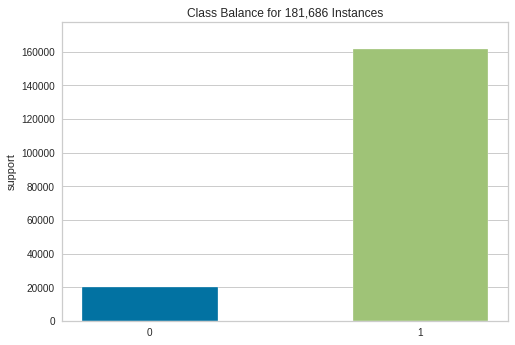

In [87]:
# Check if the class labels are balanced
from yellowbrick.target import ClassBalance
visualizer = ClassBalance()
visualizer.fit(y)
visualizer.show()

From the above chart, we can see that loans that are classified as bad have very few observations, **this class imbalance can affect our model when training**. To solve this problem, we will oversample the minority class. Oversampling can be defined as adding more copies to the minority class.

### Split Data

The data is splitted into 80% training set and 20% testing set.

In [88]:
# Split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
# Check imbalance data for training dataset
y_train.value_counts()

1    129199
0     16149
Name: good_bad, dtype: int64

### Handle Imbalance Data

In [90]:
# Import libraries for model training
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve

In [91]:
# Deal with imbalance data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)

In [92]:
# Check value counts after oversampling
y_train_series.value_counts()

1    129199
0    129199
Name: good_bad, dtype: int64

### Model Creation

For this analysis, the loan status `good_bad` is our target variable. It is a categorical variable so the Logistic Regression can be used to build the model. In this case, the model is used to predict whether the loan is bad (0) or good (1) or whether it should be accepted or rejected.

In [93]:
# Build model
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=2022)
model.fit(X_train_o, y_train_o)

LogisticRegression(max_iter=1000, random_state=2022)

### Prediction and Probability

In [94]:
# Prediction
y_hat_test = model.predict(X_test)

# Probability
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_hat_test)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index

In [95]:
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')

In [96]:
actual_predicted_probs_df.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
330616,0,0.007973,0
117322,1,0.008922,0
162511,1,0.009410,0
125203,1,0.009673,0
174123,0,0.009877,0


In [97]:
actual_predicted_probs_df.tail()

,y_test_class_actual,y_hat_test_proba,y_hat_test
250612,1,0.997871,1
242894,1,0.998093,1
299343,1,0.998182,1
270504,1,0.998244,1
292012,1,0.998876,1


In [98]:
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()

In [99]:
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()

In [100]:
actual_predicted_probs_df.head()

,index,y_test_class_actual,y_hat_test_proba,y_hat_test,cum_n_pop,cum_good,cum_bad
0,330616,0,0.007973,0,1,0,1
1,117322,1,0.008922,0,2,1,1
2,162511,1,0.009410,0,3,2,1
3,125203,1,0.009673,0,4,3,1
4,174123,0,0.009877,0,5,3,2


In [101]:
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())


In [102]:
actual_predicted_probs_df.head()

,index,y_test_class_actual,y_hat_test_proba,y_hat_test,cum_n_pop,cum_good,cum_bad,cum_n_%,cum_good_%,cum_bad_%
0,330616,0,0.007973,0,1,0,1,0.000028,0.000000,0.000254
1,117322,1,0.008922,0,2,1,1,0.000055,0.000031,0.000254
2,162511,1,0.009410,0,3,2,1,0.000083,0.000062,0.000254
3,125203,1,0.009673,0,4,3,1,0.000110,0.000093,0.000254
4,174123,0,0.009877,0,5,3,2,0.000138,0.000093,0.000508


### Model Evaluation

#### Classification Report

In [103]:
# Testing evaluation
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print(classification_report(y_test, y_hat_test))

# Evaluation scores
print("Accuracy: ", metrics.accuracy_score(y_test, y_hat_test))
print("Precision: ", metrics.precision_score(y_test, y_hat_test))
print("Recall: ", metrics.recall_score(y_test, y_hat_test))
print("F1-score: ", metrics.f1_score(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.30      0.74      0.43      3938
           1       0.96      0.79      0.87     32400

    accuracy                           0.79     36338
   macro avg       0.63      0.77      0.65     36338
weighted avg       0.89      0.79      0.82     36338

Accuracy:  0.7879354945236392
Precision:  0.9619500149655792
Recall:  0.7935493827160494
F1-score:  0.869672574753078


`classification_report()` is used to measure the quality of predictions from a classification algorithm, that in this case is the Logistic Regression.

**Accuracy:** Accuracy represents the number of correctly classified data instances over the total number of data instances. The accuracy obtained from the classification report is 0.79, which indicates that the accuracy of the model is 79%.

**Precision:** Precision is the number of correct positive results divided by the number of positive results predicted by the classifier. In other words, it is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP). The precision obtained from the classification report is 0.96, which indicates that the precision of the model is 96%.

**Recall:** Recall gives a measure of how accurately our model can identify the relevant data. It is called the true positive rate and defined as: Recall = TP / (TP + FN). The recall value obtained from the classification report is 0.79, which indicates that the model can identify 79% of the relevant data.

**F1-score**: F1-Score is the harmonic average of the precision and recall, where an F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifier has a good value for both recall and precision. The f1-score obtained from the classification report is 0.87, which indicates that the average accuracy for this classifier is the average of the F1-score for both labels, which is 87% in our case.



#### Confusion Matrix

Text(51.0, 0.5, 'Actual')

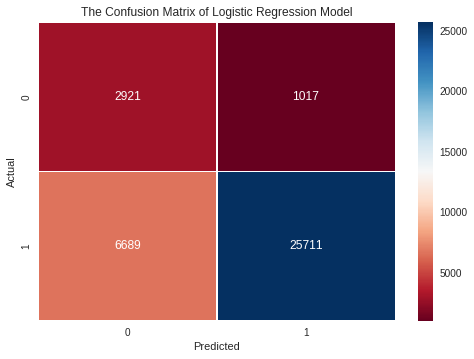

In [104]:
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('The Confusion Matrix of Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [105]:
new_df.shape

(181686, 98)

In [106]:
new_df['good_bad'].value_counts()

1    161599
0     20087
Name: good_bad, dtype: int64

`confusion_matrix()` shows a table that is used to describe the performance of a classification model on a set of test data for which the true values are known.

* The first row is for customers whose actual loan value in the test set is 0. As we can calculate, out of 181686 customers, the loan status value of 20087 of them is 0. And out of these 20087, the classifier correctly predicted 3058 of them as 0 and 999 of them as 1. It means, for 3058 customers, the actual loan status value was 0 in the test set, and the classifier also correctly predicted those as 0. However, while the actual label of 999 customers was 0, the classifier predicted those as 1.
* The second row is for customers whose actual loan value in the test set is 1. As we can calculate, out of 181686 customers, the loan status value of 161599 of them is 1. And out of these 161599, the classifier correctly predicted 25600 of them as 1 and 6681 of them as 0. It means, for 25600 customers, the actual loan status value was 1 in the test set, and the classifier also correctly predicted those as 1. However, while the actual label of 6681 customers was 1, the classifier predicted those as 0.

#### AUC-ROC Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


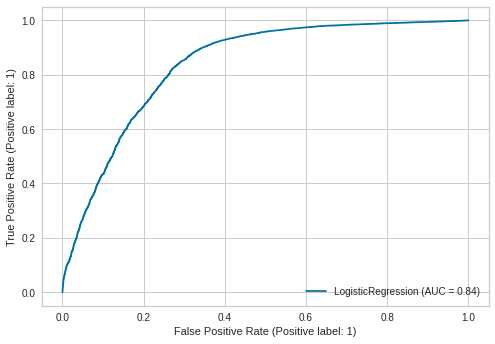

In [107]:
plot_roc_curve(model, X_test, y_test)

For this case, the higher the AUC, the better the model is at distinguishing between customers with good and bad loans. Based on the result above, we get the AUC score of 0.84. This value is 0.5 < AUC = 0.84 < 1 so it can be interpreted as there is a high chance that the Logistic Regression classifier we built will be able to distinguish the good and bad loans. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives as we've seen in the confusion matrix.

### Feature Importance

When training a model, we can use the scores calculated from feature importance to reduce the dimensionality of the model. The higher scores are usually kept and the lower scores are deleted as they are not important for the model. This not only makes the model simpler but also speeds up the model’s working, ultimately improving the performance of the model.

Feature Importance is also useful for interpreting and communicating our model to other stakeholders. By calculating scores for each feature, we can determine which features attribute the most to the predictive power of our model, that is, in this case; the Logistic Regression model.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 <a list of 97 Text major ticklabel objects>)

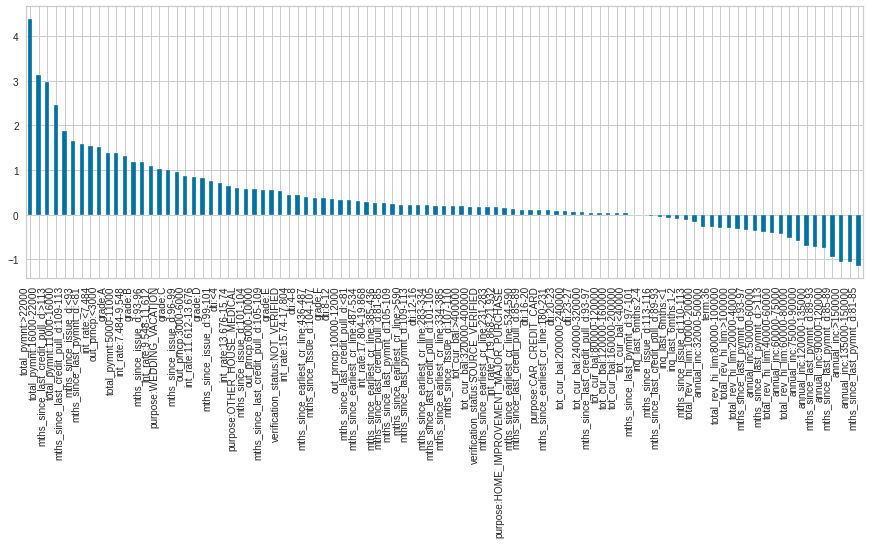

In [108]:
# Feature importance
weights = pd.Series(model.coef_[0], index=X.columns.values)

plt.figure(figsize=(15,5))
weights.sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90, ha='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

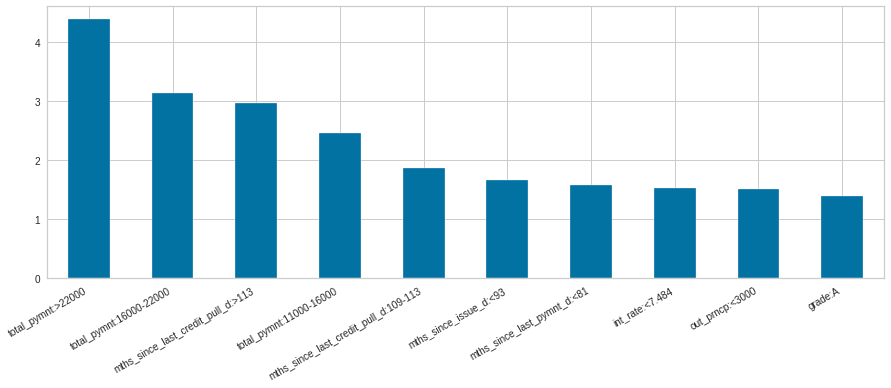

In [109]:
plt.figure(figsize=(15,5))
weights.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=30, ha='right')

From the first few high scores of feature importance, we can see that total payment and months since the last credit pull mostly contribute to the Logistic Regression model's predictive power in predicting good and bad loans.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

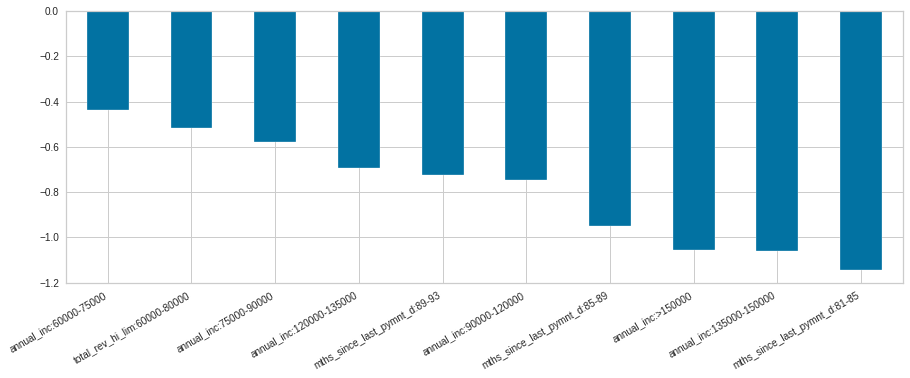

In [110]:
plt.figure(figsize=(15,5))
weights.sort_values(ascending=False).tail(10).plot(kind='bar')
plt.xticks(rotation=30, ha='right')

From the first few high scores of feature importance, we can see that total payment and months since the last credit pull mostly contribute to the Logistic Regression model's predictive power in predicting good and bad loans.

While total payment and months since the last credit pull mostly have the high scores of feature importance, the annual income, the total revolving high credit/credit limit, and the months since the last payment are the ones having a mostly low contribution to the Logistic Regression model's predictive power in predicting good and bad loans.

### Save Model

In [111]:
# Save model 
import pickle
filename = 'credit_risk_model.sav'
pickle.dump(model, open(filename, 'wb'))

---
## **6. Conclusion Presentation**

Using the CRISP-DM methodology, we've gone through business understanding, data understanding, data preparation, modeling, and evaluation. Next, we'll conclude our analysis of the credit risk case as follows.
* For most lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss. If we can identify these risky loan applicants, then such loans can be reduced, thereby cutting down the amount of credit loss. Therefore, this analysis aims to identify such applicants using EDA and machine learning by creating a Logistic Regression model to predict credit risk (whether the loan is good/accepted or bad/rejected) using a dataset provided by the lending company consisting of data on customers' loans.
* From data exploration, it's found that there are mostly good loans (Current and Fully Paid) for 88,9%, but there are also still bad loans (Charged Off, Late (31-120 days), In Grace Period, Late (16-30 days), and Default) for the remaining 11,1%. 
* The weight of evidence (WOE), Information Value (IV), and Binning are used to help us decide which variables are useful for prediction in the Logistic Regression model. This results in a Logistic Regression with an accuracy of 0.79, precision of 0.96, recall of 0.79, and F1-score of 0.87. Additionally, the AUC value is 0.84. This means that the Logistic Regression Model we built has a high chance to be able to distinguish the good and bad loans. In other words, the model is good in predicting whether the loan should be accepted or rejected.
* From the Logistic Regression model we built, it's found that total payment and months since the last credit pull are the features that mostly contribute to the Logistic Regression model's predictive power in predicting good and bad loans, while the annual income, the total revolving high credit/credit limit, and the months since the last payment are least contributing features.
* There are still more models that can be explored to improve the prediction of credit risk and the model selection may be according to what evaluation metric is chosen. Moreover, hyperparameter tuning can be conducted as it is choosing a set of optimal hyperparameters for a learning algorithm that leads to improvement in model performance. Lastly, model performance can also be improved by optimizing feature selection, that is by isolating the most consistent, non-redundant, and relevant features to use in model construction and selecting those features which contribute most to the prediction.

